In [50]:
import jLM
from jLM.RDME import File as RDMEFile

import numpy as np

import pandas as pd

import os

import pickle

import importlib
import sys

import WCM_analysis
importlib.reload(WCM_analysis)

from scipy.optimize import fsolve
from scipy.optimize import least_squares

from collections import defaultdict, OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
from math import floor
from math import log10
def round_sig(x, sig=2):
    negative = False
    if x < 0:
        negative = True
    x = abs(x)
    if negative:
        return -1*round(x, sig-int(floor(log10(abs(x))))-1)
    elif x==0.0:
        return 0.0
    else:
        return round(x, sig-int(floor(log10(abs(x))))-1)

In [3]:
in_dir = '/Data1/zane/Models/mincell/merged/'
# in_dir = '/Data1/zane/Models/mincell/Mar10/'
# in_dir = '/Data1/zane/Models/mincell/Jan31/'

in_label = 'counts_and_fluxes'
min_rep = 1
max_rep = 20

reps = np.arange(min_rep,max_rep+1,dtype=np.int32)

# reps = np.array([1,2,3,4,5,7,8,9,10])

merging_required = True
# merging_required = False

# out_dir = in_dir + 'analysis/'
# try:
#     os.mkdir(out_dir)
# except:
#     print('Failed')

pkl_label = 'ensemble_test'

figDir = '/home/zane/Pictures/mc4d/'

if not os.path.isdir(figDir):
    os.mkdir(figDir)


In [4]:
# if merging_required == True:

w = WCM_analysis.WCM_ensemble()

# this assumes trajectories are in the below format
# (in_dir)/(in_label).(replicate).csv
w.set_traj_files(in_dir,in_label,reps)

w.load_trajs()

w.merge_trajs()

#     w.write_merged_ensemble(in_dir,pkl_label)
    
# w = WCM_analysis.WCM_ensemble()

# w.read_merged_ensemble(in_dir,pkl_label)


Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Arra

In [5]:
t = w.get_t()

In [6]:
csvfile = in_dir + 'counts_and_fluxes.1.csv'
traj = pd.read_csv(csvfile, index_col=False)
traj = traj.reset_index(drop=True)
# traj = traj.T
totalTime = len(t)
print(totalTime)
specList = traj['Time'].values
specList

7201


array(['chromosome', 'PM_0001', 'PM_0002', ..., 'F_FAt', 'F_GLYCt',
       'F_NAt'], dtype=object)

In [7]:
sim_properties_file = '/home/zane/Models/mincell/4DWCM/Analysis/sim_properties_1_9.pkl'
with open(sim_properties_file, 'rb') as handle:
    sim_properties = pickle.load(handle)
genome = sim_properties['genome']

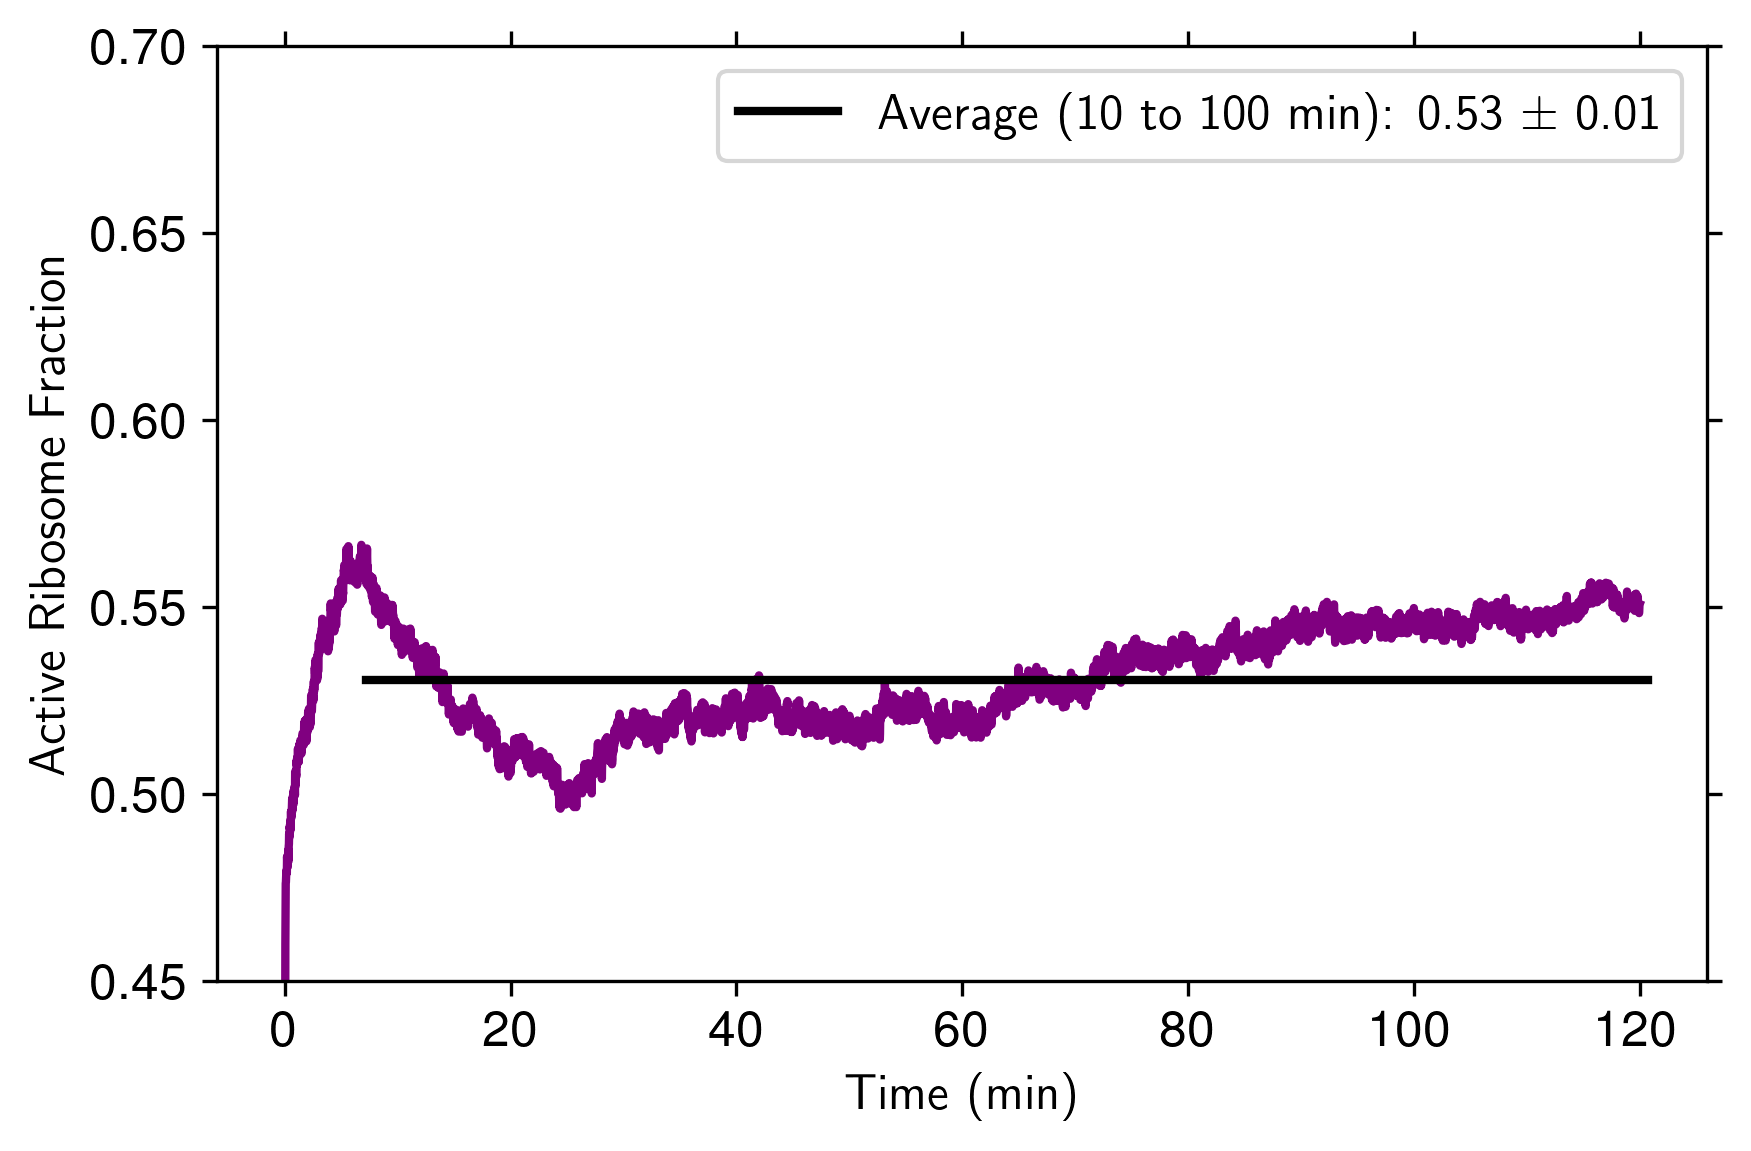

In [8]:
# Active Ribosomes

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

ribo_avg = np.zeros(len(t))

for specID in specList:
    
    if specID.startswith('RB_'):
        
        riboSpec = [specID]

        stateTrace = w.get_avg_species_traces(riboSpec)
        
        ribo_avg = np.add(ribo_avg,stateTrace)
        
riboSpec = ['ribosomeP']

ribo_avg_tot = w.get_avg_species_traces(riboSpec)

for specID in specList:
    
    if specID.startswith('RB_'):
        
        riboSpec = [specID]

        stateTrace = w.get_avg_species_traces(riboSpec)
        
        ribo_avg_tot = np.add(ribo_avg_tot,stateTrace)
        
ax.plot(t/60, np.divide(ribo_avg[0],ribo_avg_tot[0]),color='purple',lw=2)

ribo_tot_dat = ribo_avg_tot[0]
ribo_act_dat = np.divide(ribo_avg[0],ribo_avg_tot[0])

avg_avg = np.average(np.divide(ribo_avg[0][600:],ribo_avg_tot[0][600:]))
avg_std = np.std(np.divide(ribo_avg[0][600:],ribo_avg_tot[0][600:]))
ax.axhline(avg_avg, xmin=0.1, xmax=0.96, alpha=1.0, color='k', 
           linewidth=2.0, label='Average (10 to 100 min): {} $\pm$ {}'.format(round_sig(avg_avg, 2), round_sig(avg_std,1)))

ax.set_ylim([0.45,0.7])

ax.set_ylabel('Active Ribosome Fraction')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.legend()

plt.tight_layout()

plt.savefig(f'{figDir}active_ribosomes.png')

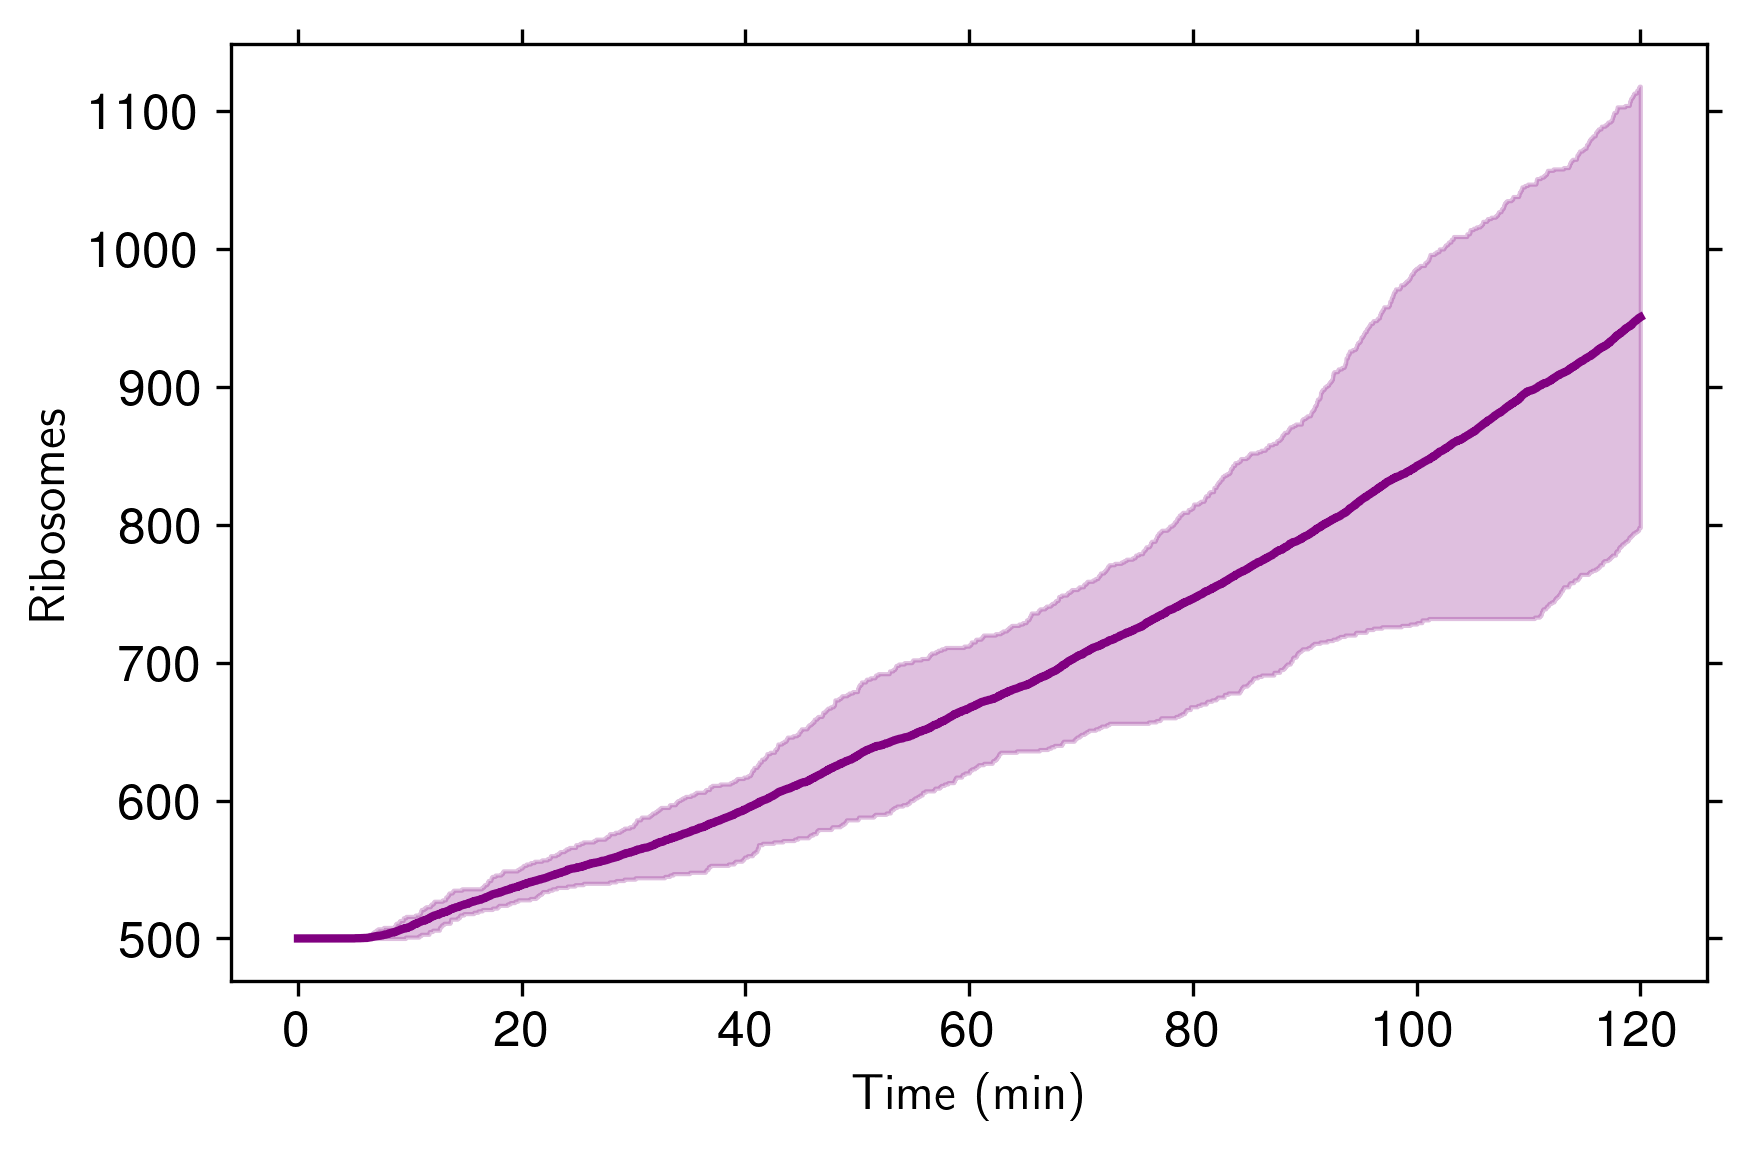

In [9]:
plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

riboSpec = ['ribosomeP']

ribo_avg = w.get_species_traces(riboSpec)

for specID in specList:
    
    if specID.startswith('RB_'):
        
        riboSpec = [specID]

        stateTrace = w.get_species_traces(riboSpec)
        
        ribo_avg = np.add(ribo_avg,stateTrace)
        
ribosome_totals = ribo_avg[0].T

ax.plot(t/60, np.average(ribosome_totals, axis=0),color='purple',lw=2)

ax.fill_between(t/60, np.percentile(ribosome_totals, 0, axis=0), 
                np.percentile(ribosome_totals,100,axis=0), color='purple', alpha=0.25)

ax.set_ylabel('Ribosomes')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)
# plt.ylim(4.5,13)
# plt.legend(loc='upper left')
# plt.title(species_list)

# ax.set_xlim(-3,112)

plt.tight_layout()

plt.savefig(f'{figDir}ribosome_total.png')

/home/zane/anaconda3/envs/mc4d/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/home/zane/anaconda3/envs/mc4d/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


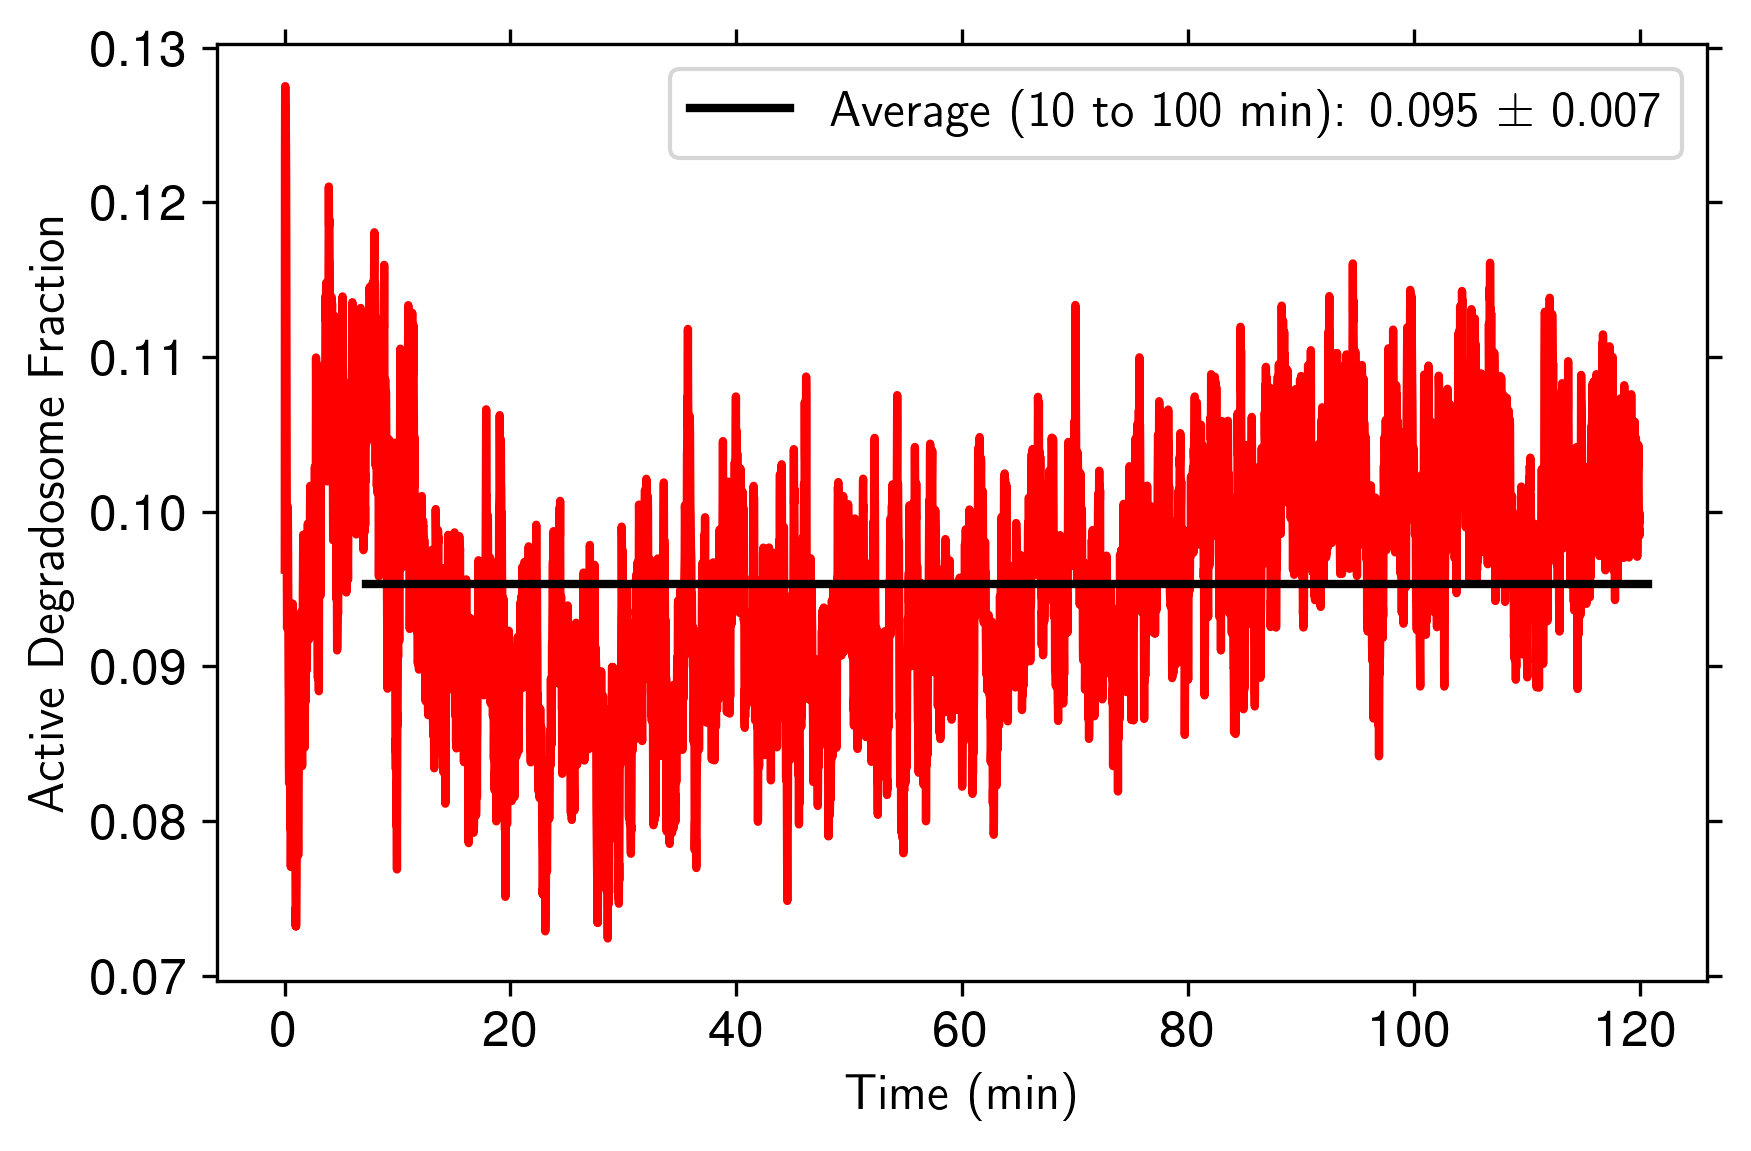

In [10]:
# Active Degradosomes

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

avg = np.zeros(len(t))

for specID in specList:
    
    if specID.startswith('D_'):
        
        Spec = [specID]

        stateTrace = w.get_avg_species_traces(Spec)
        
        avg = np.add(avg,stateTrace)
        
Spec = ['Degradosome']

avg_tot = w.get_avg_species_traces(Spec)

for specID in specList:
    
    if specID.startswith('D_'):
        
        Spec = [specID]

        stateTrace = w.get_avg_species_traces(Spec)
        
        avg_tot = np.add(avg_tot,stateTrace)
        
ax.plot(t/60, np.divide(avg[0],avg_tot[0]),color='red',lw=2)

deg_tot_dat = avg_tot[0]
deg_act_dat = np.divide(avg[0],avg_tot[0])

avg_avg = np.average(np.divide(avg[0][600:],avg_tot[0][600:]))
avg_std = np.std(np.divide(avg[0][600:],avg_tot[0][600:]))

ax.axhline(avg_avg, xmin=0.1, xmax=0.96, alpha=1.0, color='k', 
           linewidth=2.0, label='Average (10 to 100 min): {} $\pm$ {}'.format(round_sig(avg_avg, 2), round_sig(avg_std, 1)))

ax.legend()

ax.set_ylabel('Active Degradosome Fraction')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.tight_layout()

plt.savefig(f'{figDir}active_degradosomes.png')

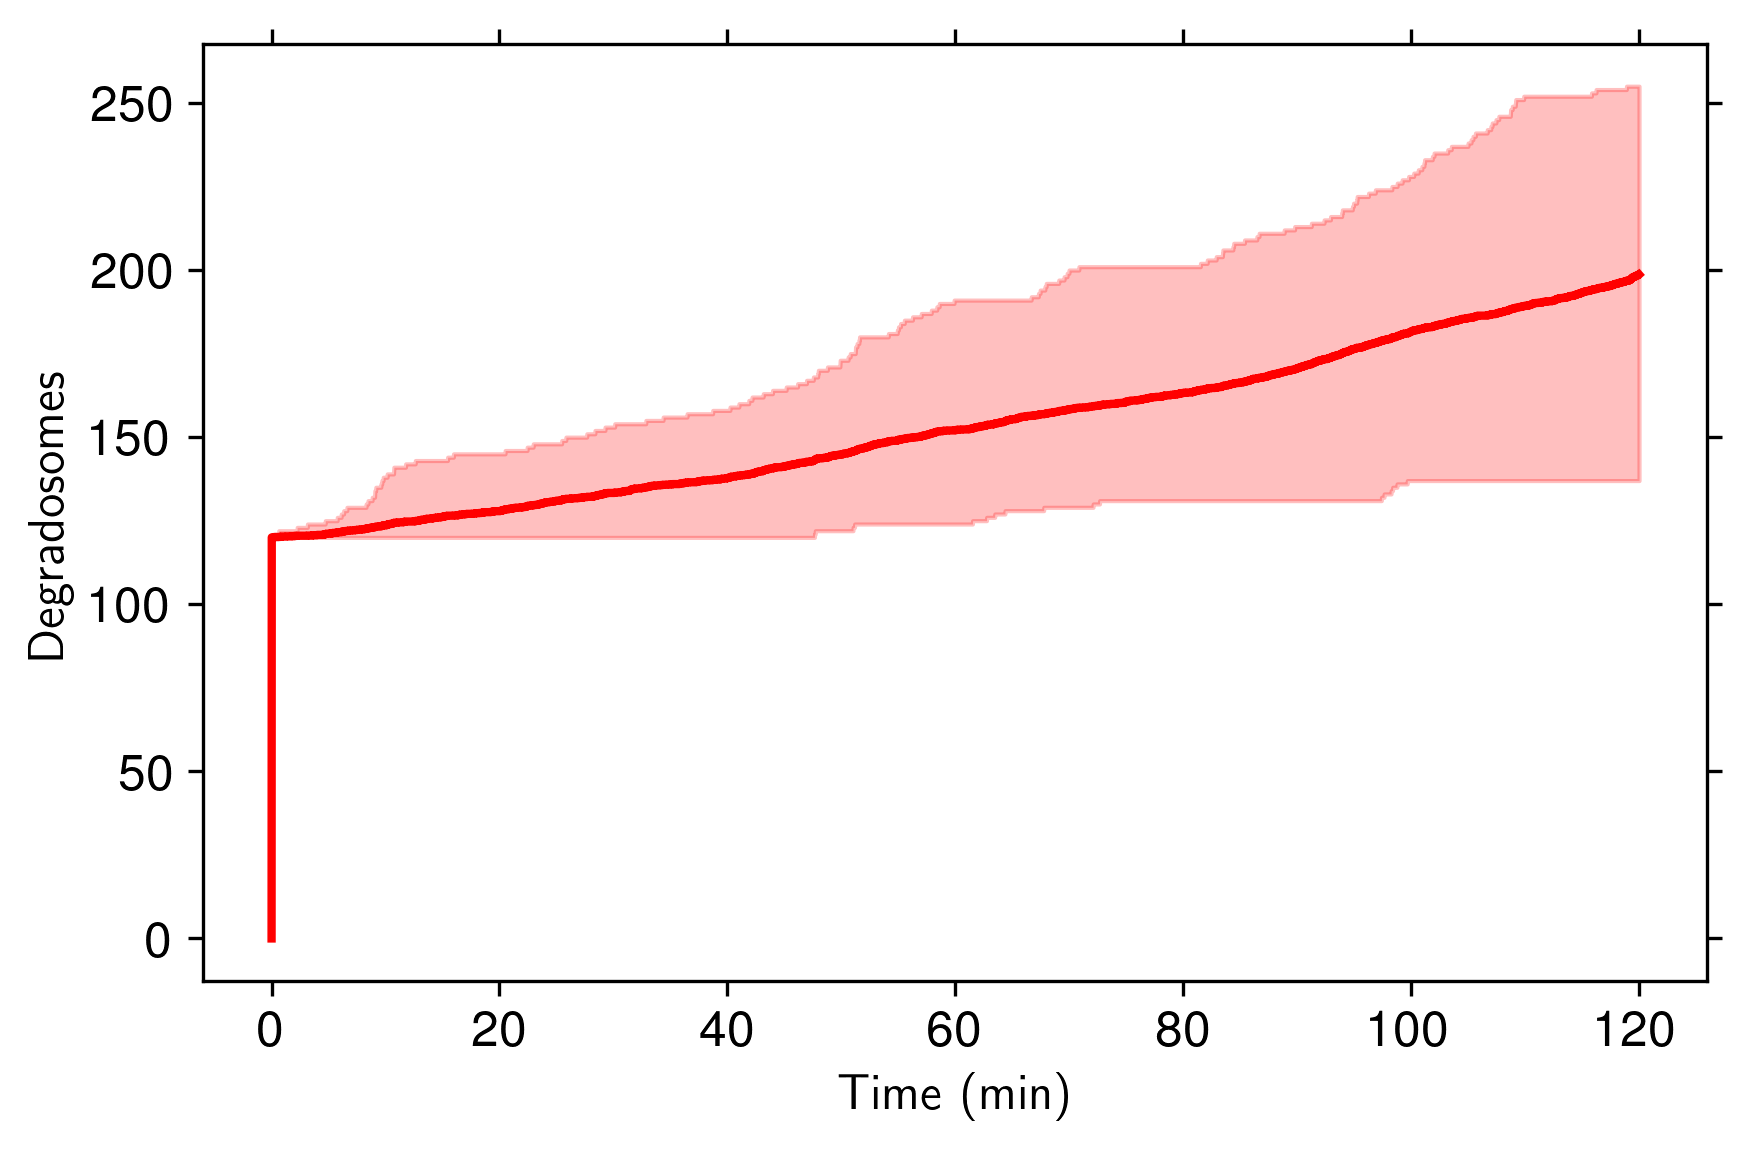

In [11]:
# Active Degradosomes

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

avg = np.zeros(len(t))

for specID in specList:
    
    if specID.startswith('D_'):
        
        Spec = [specID]

        stateTrace = w.get_avg_species_traces(Spec)
        
        avg = np.add(avg,stateTrace)
        
Spec = ['Degradosome']

avg_tot = w.get_species_traces(Spec)

for specID in specList:
    
    if specID.startswith('D_'):
        
        Spec = [specID]

        stateTrace = w.get_species_traces(Spec)
        
        avg_tot = np.add(avg_tot,stateTrace)
        
degradosome_totals = avg_tot[0].T
        
ax.plot(t/60, np.average(degradosome_totals, axis=0), color='red',lw=2)
ax.fill_between(t/60, np.percentile(degradosome_totals, 0, axis=0), 
                np.percentile(degradosome_totals,100,axis=0), color='red', alpha=0.25)


ax.set_ylabel('Degradosomes')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.tight_layout()

plt.savefig(f'{figDir}total_degradosomes.png')

/home/zane/anaconda3/envs/mc4d/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/home/zane/anaconda3/envs/mc4d/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in true_divide


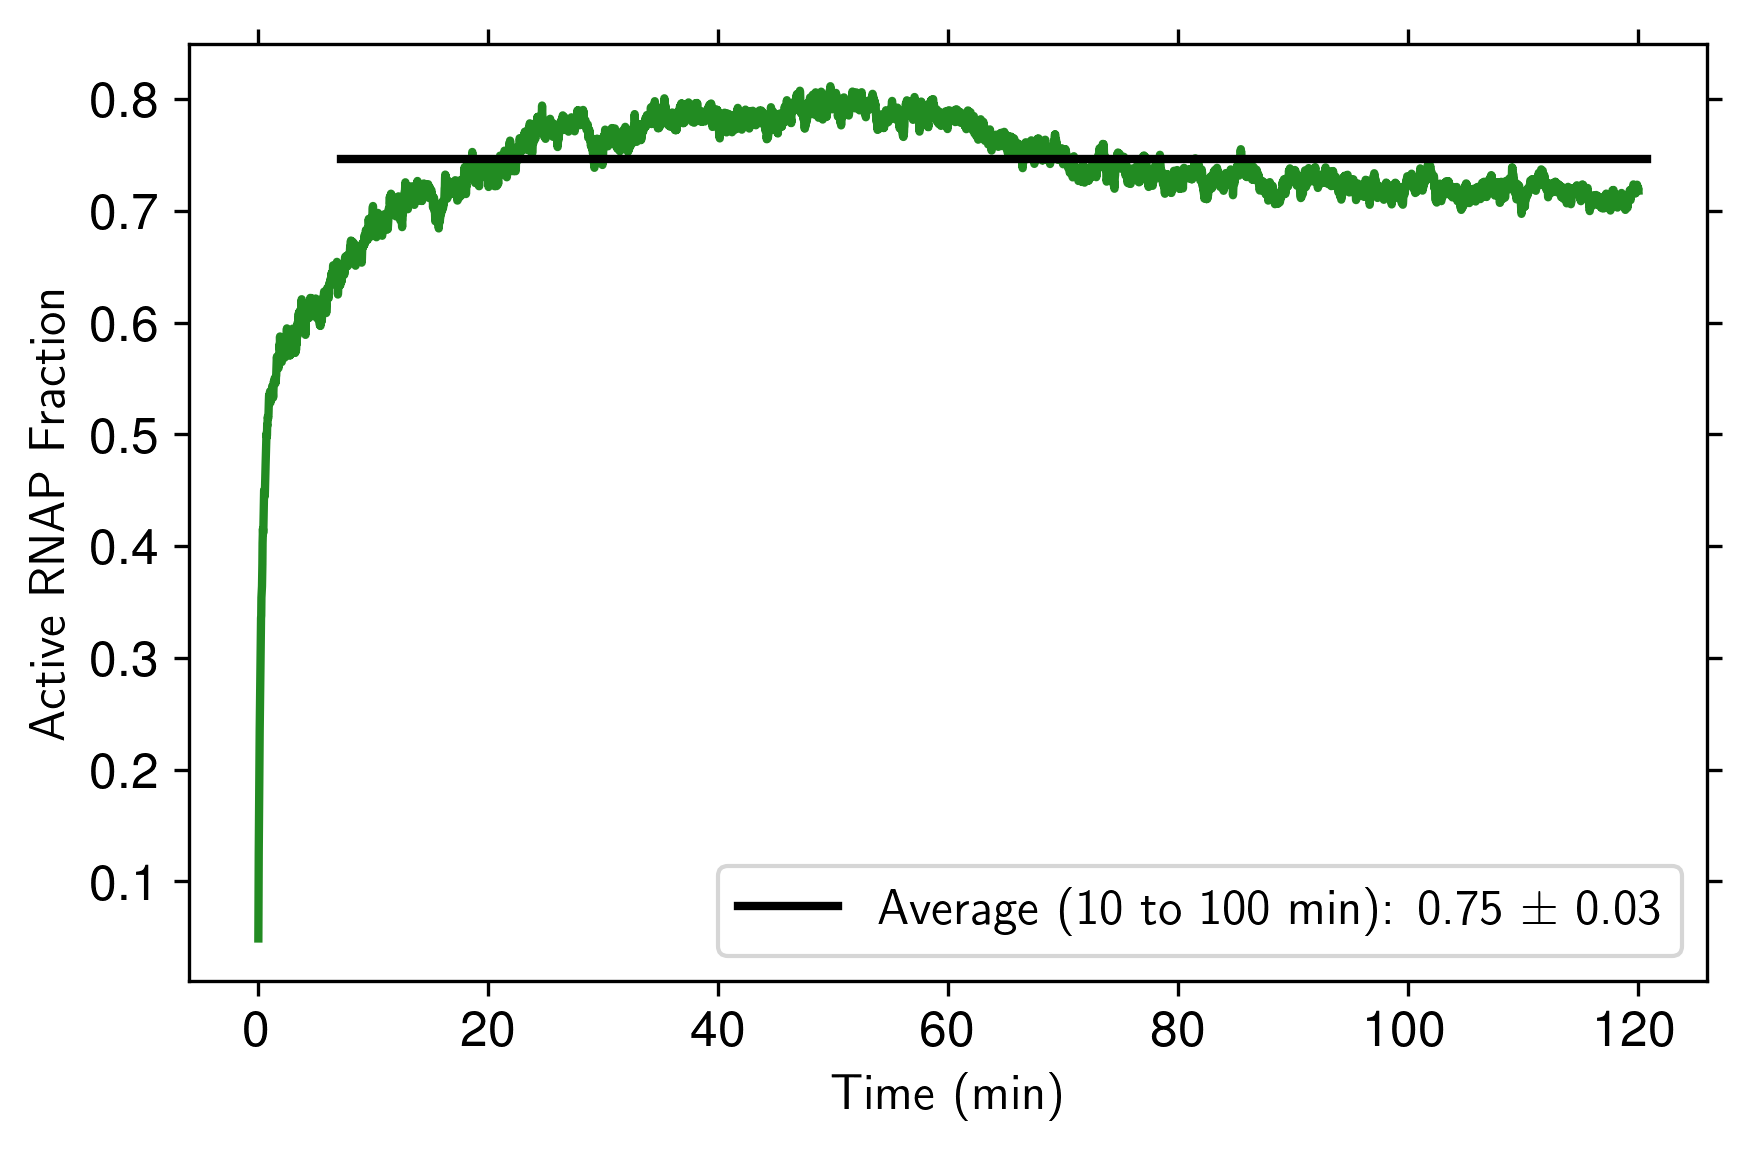

In [12]:
# Active Ribosomes

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

ribo_avg = np.zeros(len(t))

for specID in specList:
        
    if specID.startswith('RP_') and ('_c' not in specID):
        
#         print(specID)
        
        if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
            
            multiRNAPcheck = specID.split('_')
            
            RNAP_count = int(multiRNAPcheck[-2])
#             print(RNAP_count)
            
            riboSpec = [specID]

            stateTrace = w.get_avg_species_traces(riboSpec)
            
            stateTrace = stateTrace*RNAP_count
            
        else:
            
            riboSpec = [specID]

            stateTrace = w.get_avg_species_traces(riboSpec)
        
        ribo_avg = np.add(ribo_avg,stateTrace)
        
        
riboSpec = ['RNAP']

ribo_avg_tot = w.get_avg_species_traces(riboSpec)


for specID in specList:
    
    if specID.startswith('RP_') and ('_c' not in specID):
        
#         print(specID)
        
        if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
            
            multiRNAPcheck = specID.split('_')
            
            RNAP_count = int(multiRNAPcheck[-2])
#             print(RNAP_count)
            
            riboSpec = [specID]

            stateTrace = w.get_avg_species_traces(riboSpec)
            
            stateTrace = stateTrace*RNAP_count
            
        else:
            
            riboSpec = [specID]

            stateTrace = w.get_avg_species_traces(riboSpec)
        
        ribo_avg_tot = np.add(ribo_avg_tot,stateTrace)
        
        
ax.plot(t/60, np.divide(ribo_avg[0],ribo_avg_tot[0]),color='forestgreen',lw=2)

rnap_tot_dat = ribo_avg_tot[0]
rnap_act_dat = np.divide(ribo_avg[0],ribo_avg_tot[0])

avg_avg = np.average(np.divide(ribo_avg[0][600:],ribo_avg_tot[0][600:]))
avg_std = np.std(np.divide(ribo_avg[0][600:],ribo_avg_tot[0][600:]))
ax.axhline(avg_avg, xmin=0.1, xmax=0.96, alpha=1.0, color='k', 
           linewidth=2.0, label='Average (10 to 100 min): {} $\pm$ {}'.format(round_sig(avg_avg, 2), round_sig(avg_std,1)))

# ax.set_ylim([0.45,0.7])

ax.set_ylabel('Active RNAP Fraction')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.legend()

plt.tight_layout()

plt.savefig(f'{figDir}active_RNAP.png')

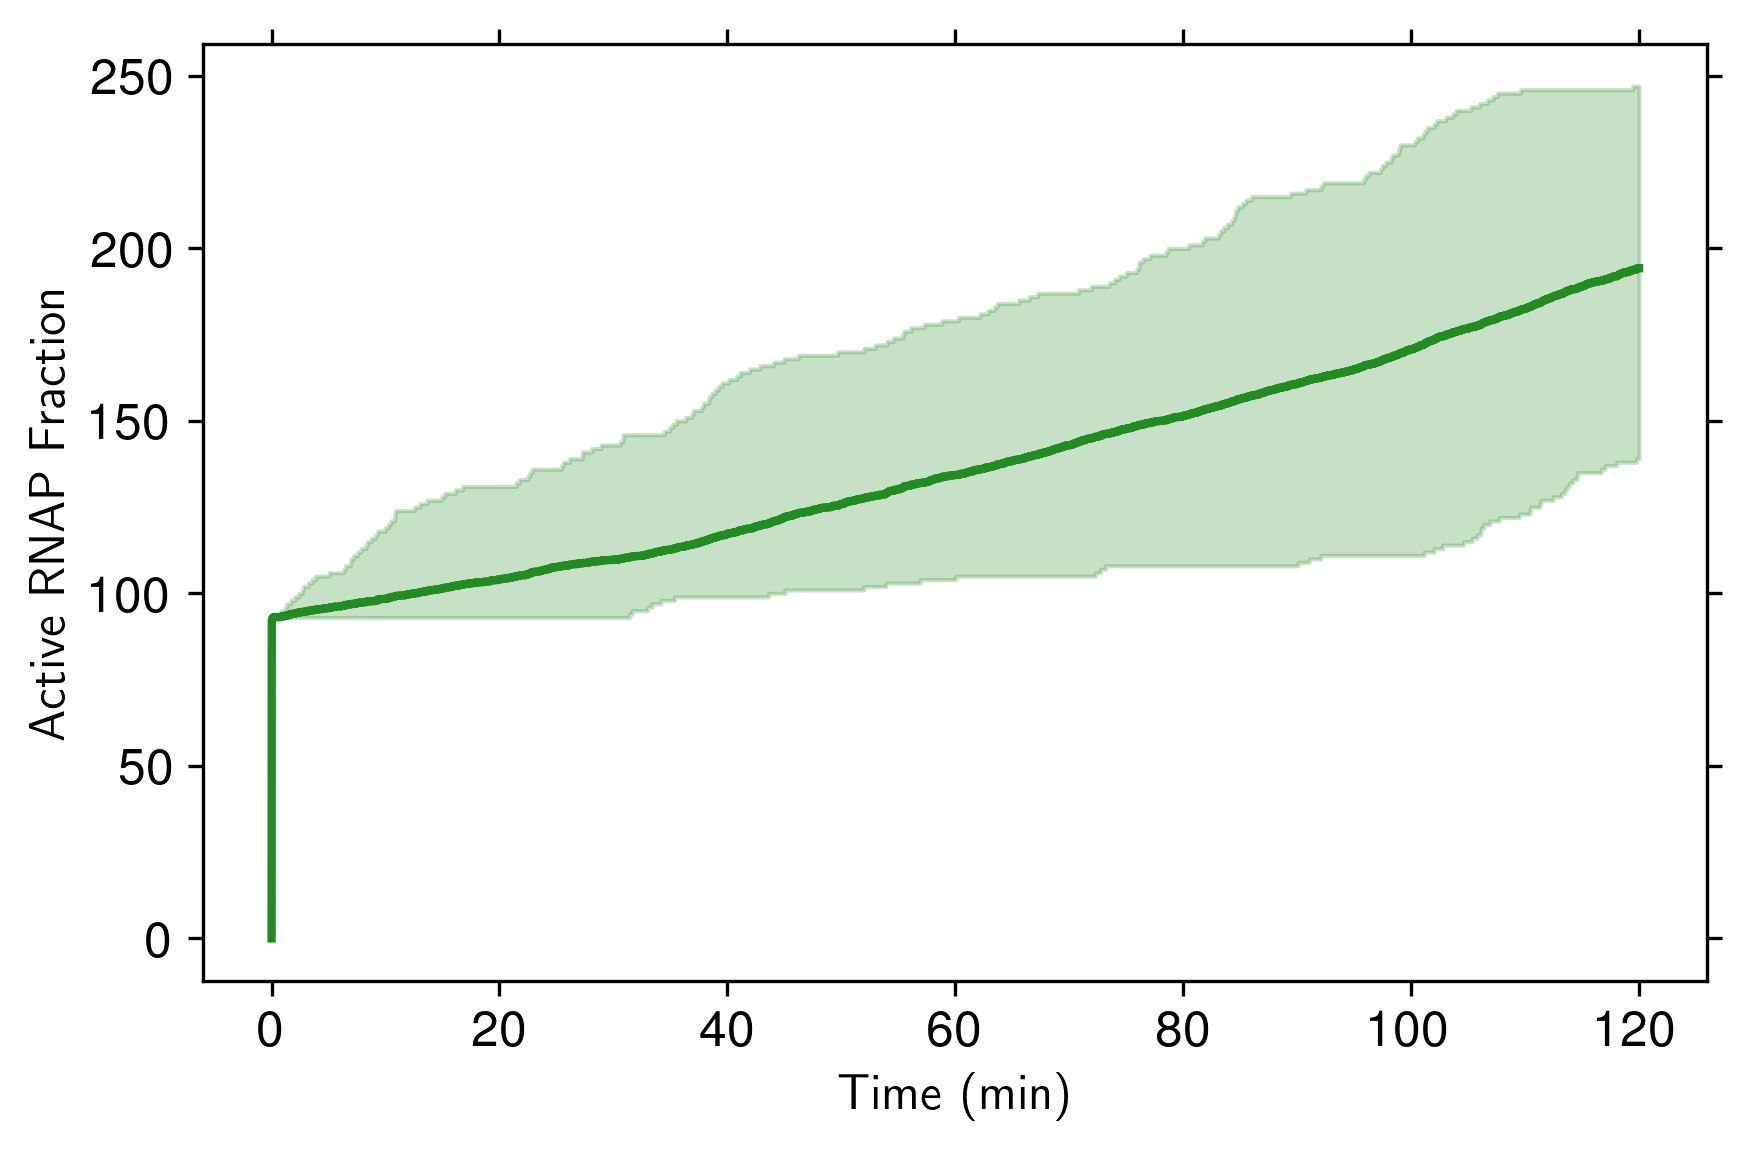

In [13]:
# Active Ribosomes

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()
        
        
riboSpec = ['RNAP']

ribo_avg_tot = w.get_species_traces(riboSpec)


for specID in specList:
    
    if specID.startswith('RP_') and ('_c' not in specID):
        
#         print(specID)
        
        if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
            
            multiRNAPcheck = specID.split('_')
            
            RNAP_count = int(multiRNAPcheck[-2])
#             print(RNAP_count)
            
            riboSpec = [specID]

            stateTrace = w.get_species_traces(riboSpec)
            
            stateTrace = stateTrace*RNAP_count
            
        else:
            
            riboSpec = [specID]

            stateTrace = w.get_species_traces(riboSpec)
        
        ribo_avg_tot = np.add(ribo_avg_tot,stateTrace)
        
        
rnap_totals = ribo_avg_tot[0].T
        
        
ax.plot(t/60, np.average(rnap_totals, axis=0), color='forestgreen',lw=2)
ax.fill_between(t/60, np.percentile(rnap_totals, 0, axis=0), 
                np.percentile(rnap_totals,100,axis=0), color='forestgreen', alpha=0.25)

ax.set_ylabel('Active RNAP Fraction')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

# plt.legend()

plt.tight_layout()

plt.savefig(f'{figDir}total_RNAP.png')

{2: {'time': 211, 'DnaA': 20}, 4: {'time': 295, 'DnaA': 20}, 5: {'time': 487, 'DnaA': 20}, 8: {'time': 217, 'DnaA': 20}, 10: {'time': 664, 'DnaA': 20}, 11: {'time': 634, 'DnaA': 20}, 12: {'time': 308, 'DnaA': 20}, 14: {'time': 249, 'DnaA': 20}, 15: {'time': 288, 'DnaA': 20}, 16: {'time': 166, 'DnaA': 20}, 0: {'time': 478, 'DnaA': 21}, 9: {'time': 197, 'DnaA': 21}, 13: {'time': 619, 'DnaA': 21}, 17: {'time': 214, 'DnaA': 21}, 3: {'time': 115, 'DnaA': 22}, 6: {'time': 261, 'DnaA': 22}, 7: {'time': 310, 'DnaA': 22}, 18: {'time': 108, 'DnaA': 22}, 19: {'time': 178, 'DnaA': 22}, 1: {'time': 104, 'DnaA': 23}}
[211, 295, 487, 217, 664, 634, 308, 249, 288, 166, 478, 197, 619, 214, 115, 261, 310, 108, 178, 104]
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23]


Text(0, 0.5, 'Cells')

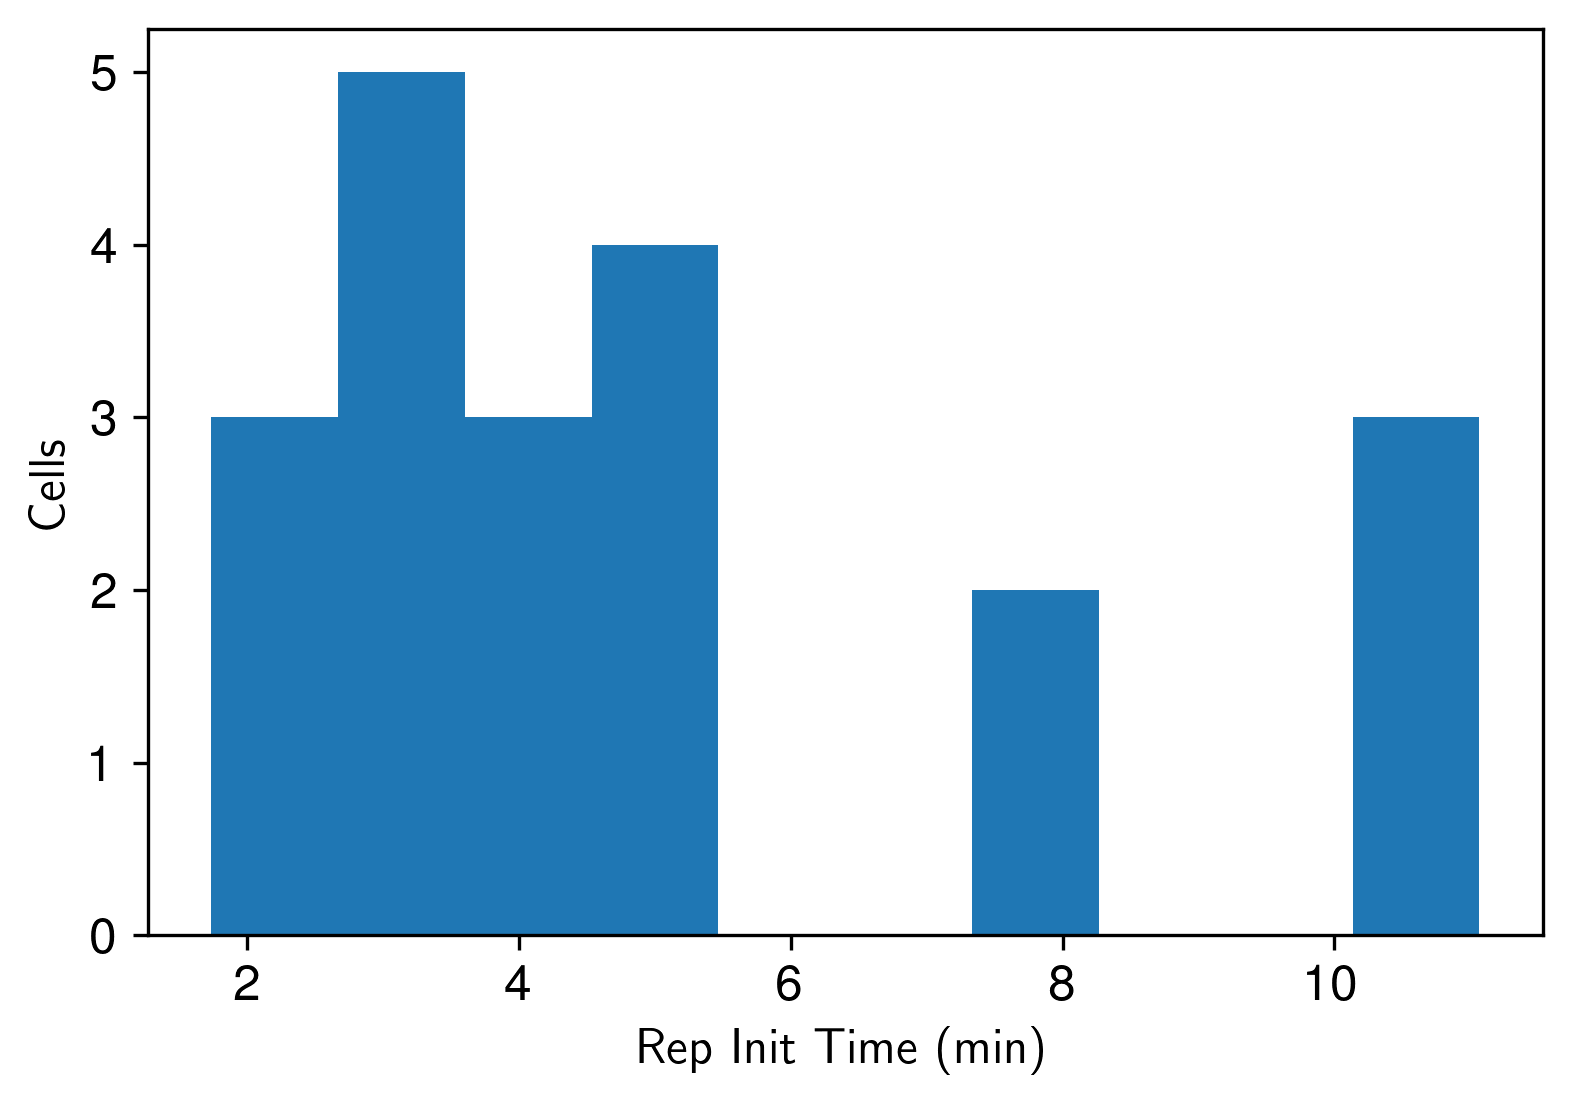

In [14]:
repDat = {}

for i in range(20,31):
    
    repInitCheckID = [f'ori_rep2_DnaA_{i}']

    repIC = w.get_species_traces(repInitCheckID)
    repIC = repIC[0].T
    
    repICdat = np.argwhere(repIC>0)
    
    if len(repICdat)>0:
    
        for repCheck in repICdat:

            replicate = repCheck[0]
            repTime = repCheck[1]
            
            if replicate not in repDat:
                repDat[replicate] = {}
                repDat[replicate]['time'] = totalTime
            repDat[replicate]['DnaA'] = i
            if repTime<repDat[replicate]['time']:
                repDat[replicate]['time'] = repTime
                
print(repDat)

repInitTimes = []
repDnaa = []

for repl, repI in repDat.items():
    repInitTimes.append(repI['time'])
    repDnaa.append(repI['DnaA'])
    
print(repInitTimes)
print(repDnaa)

plt.hist(np.array(repInitTimes)/60)
plt.xlabel('Rep Init Time (min)')
plt.ylabel('Cells')

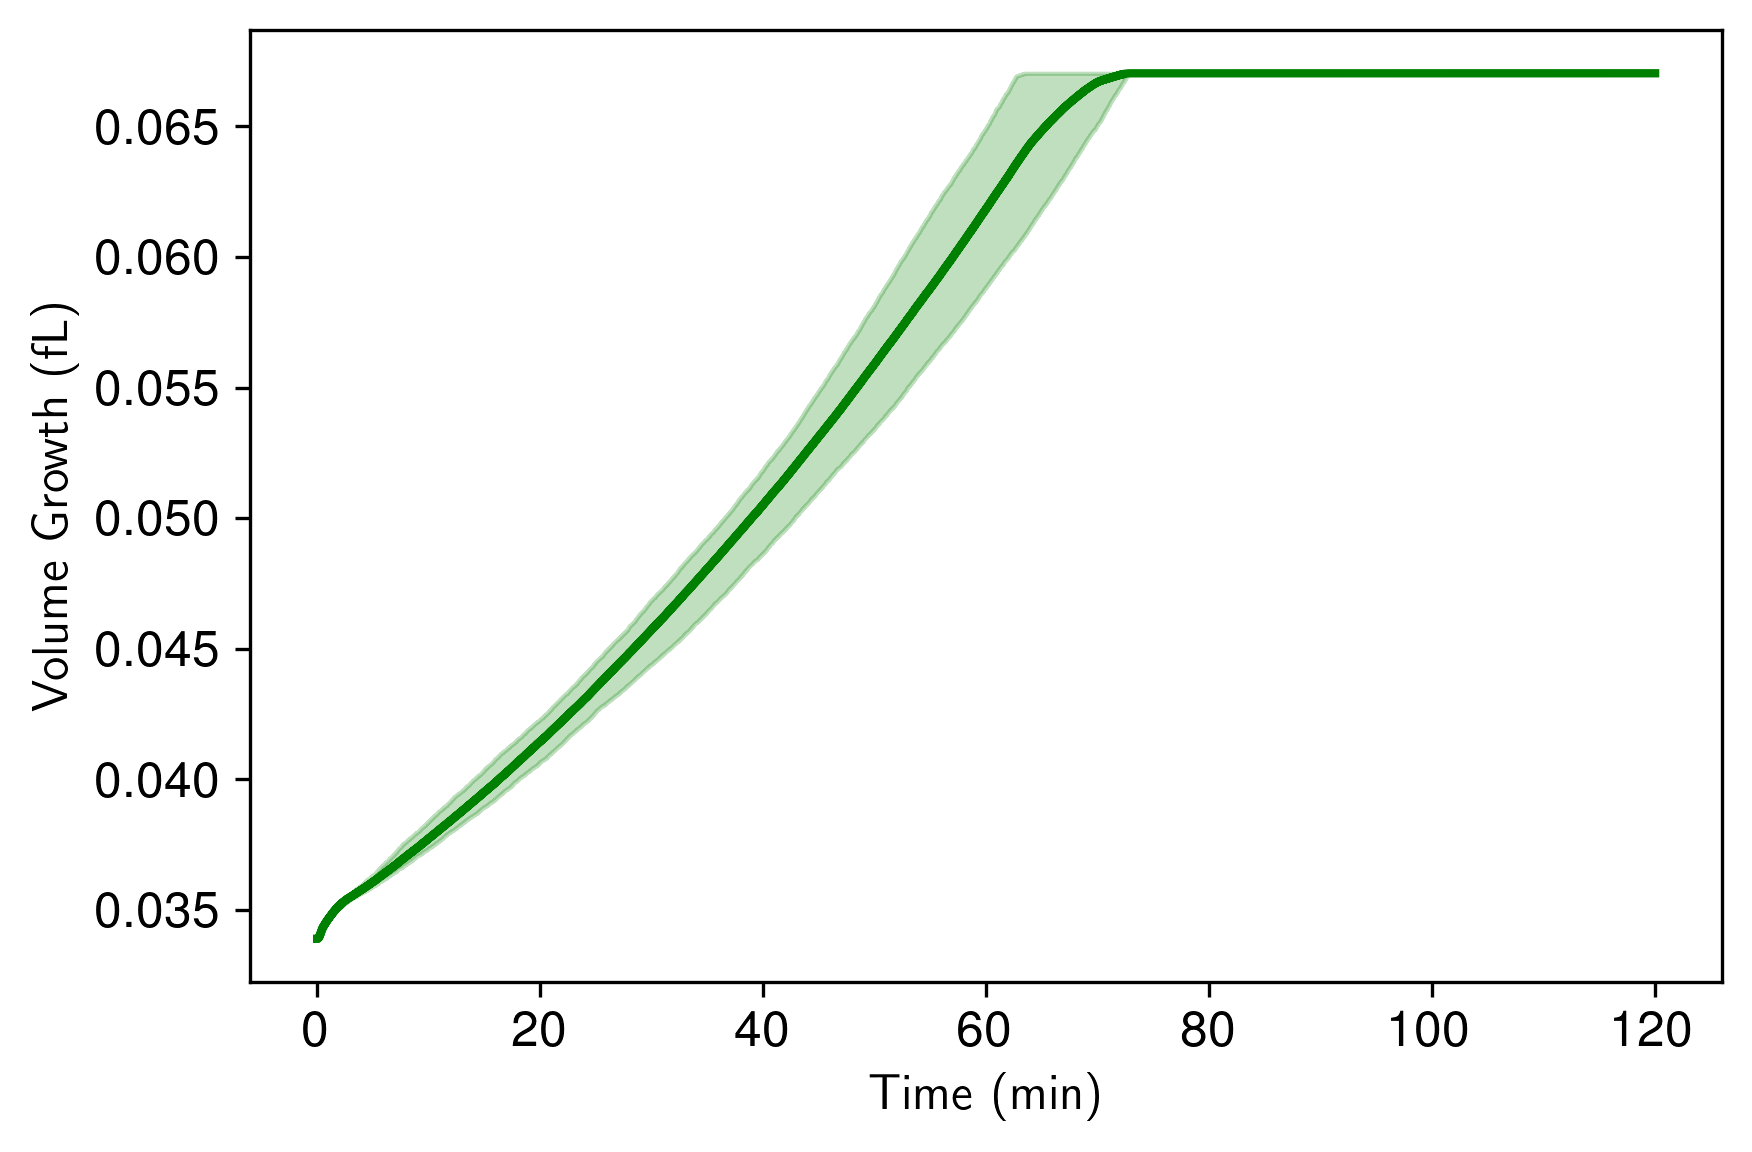

In [15]:
plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

vol = ['Volume']

vols = w.get_species_traces(vol)
vols = vols[0].T/1000000
        
ax.plot(t/60, np.average(vols, axis=0),color='green',lw=2)
ax.fill_between(t/60, np.percentile(vols, 1, axis=0), np.percentile(vols,99,axis=0), color='green', alpha=0.25)

ax.set_ylabel('Volume Growth (fL)')
ax.set_xlabel('Time (min)')

plt.tight_layout()

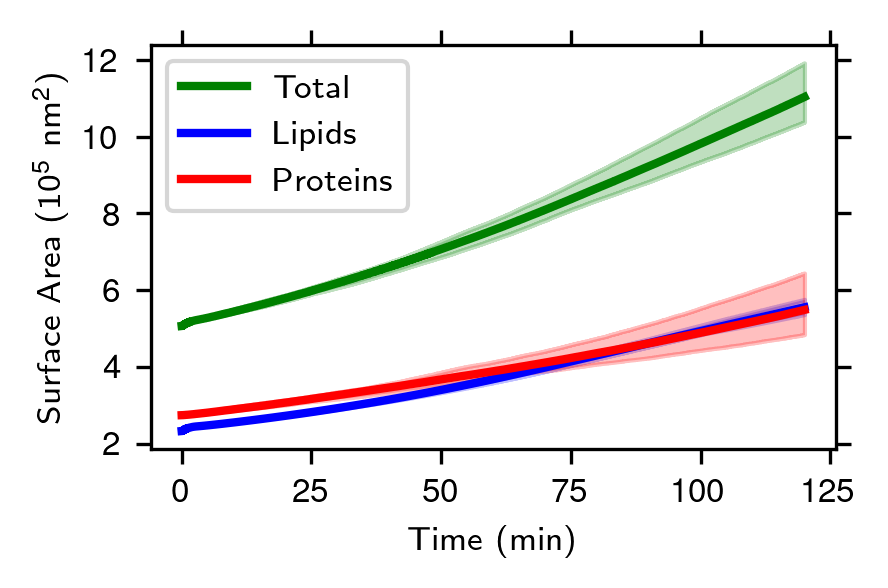

In [16]:
plt.rcParams.update({'font.size': 8})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(3,2))

ax = plt.gca()

sa = ['SA_total']

tot_sa = w.get_species_traces(sa)/1e5
tot_sa = tot_sa[0].T
        
ax.plot(t/60, np.average(tot_sa, axis=0), color='green',lw=2, label='Total')
ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0), np.percentile(tot_sa,99,axis=0), color='green', alpha=0.25)

sa = ['SA_lipid']

lipid_sa = w.get_species_traces(sa)/1e5
lipid_sa = lipid_sa[0].T
        
ax.plot(t/60, np.average(lipid_sa, axis=0), color='blue',lw=2, label='Lipids')
ax.fill_between(t/60, np.percentile(lipid_sa,1,axis=0), np.percentile(lipid_sa,99,axis=0), color='blue', alpha=0.25)

sa = ['SA_ptn']

ptn_sa = w.get_species_traces(sa)/1e5
ptn_sa = ptn_sa[0].T
        
ax.plot(t/60, np.average(ptn_sa, axis=0), color='red',lw=2, label='Proteins')
ax.fill_between(t/60, np.percentile(ptn_sa,1,axis=0), np.percentile(ptn_sa,99,axis=0), color='red', alpha=0.25)

ax.set_ylabel('Surface Area (10$^5$ nm$^2$)')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

ax.legend()

plt.tight_layout()

plt.savefig(f'{figDir}sa_breakdown.png')

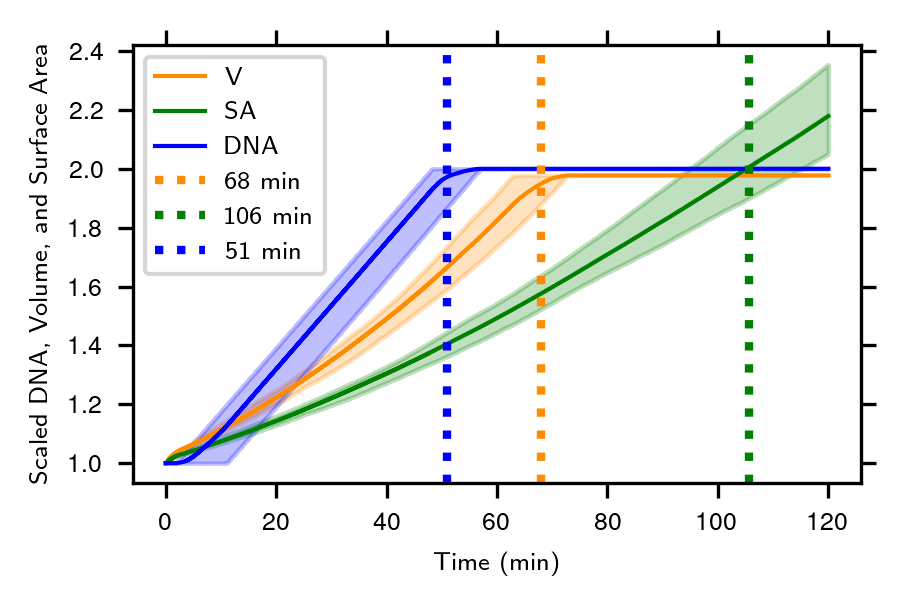

In [17]:
plt.rcParams.update({'font.size': 6})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(3,2))

ax = plt.gca()

vol = ['Volume']

vols = w.get_species_traces(vol)
vols = vols[0].T
        
ax.plot(t/60, np.average(vols, axis=0)/np.average(vols, axis=0)[0],color='darkorange',lw=1, label='V')
ax.fill_between(t/60, np.percentile(vols, 1, axis=0)/np.average(vols, axis=0)[0],
                np.percentile(vols,99,axis=0)/np.average(vols, axis=0)[0], color='darkorange', alpha=0.25)

sa = ['SA_total']

tot_sa = w.get_species_traces(sa)/1e5
tot_sa = tot_sa[0].T
        
ax.plot(t/60, np.average(tot_sa, axis=0)/np.average(tot_sa, axis=0)[0], color='green',lw=1, label='SA')
ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0)/np.average(tot_sa, axis=0)[0],
                np.percentile(tot_sa,99,axis=0)/np.average(tot_sa, axis=0)[0], color='green', alpha=0.25)

chro = ['chromosome']

tot_chro = w.get_species_traces(chro)
tot_chro = tot_chro[0].T
        
ax.plot(t/60, np.average(tot_chro, axis=0)/np.average(tot_chro, axis=0)[0], color='blue',lw=1, label='DNA')
ax.fill_between(t/60, np.percentile(tot_chro,1,axis=0)/np.average(tot_chro, axis=0)[0],
                np.percentile(tot_chro,99,axis=0)/np.average(tot_chro, axis=0)[0], color='blue', alpha=0.25)

volDT = []
saDT = []
chrDT = []

for rep in range(len(reps)):
    
    vol_trace = np.divide(vols[rep],vols[rep][0])
    
    repVolDT = min(np.argwhere(vol_trace>=1.975))/60
    
    volDT.append(repVolDT)
    
    sa_trace = np.divide(tot_sa[rep],tot_sa[rep][0])
    
    repSaDT = min(np.argwhere(sa_trace>=2.0))/60
    
    saDT.append(repSaDT)
    
    chr_trace = np.divide(tot_chro[rep],tot_chro[rep][0])
    
    repChrDT = min(np.argwhere(chr_trace>=1.99))/60
    
    chrDT.append(repChrDT)

v_dt = np.average(np.array(volDT))

ax.axvline(v_dt, lw=2, linestyle=':', color='darkorange', label='{} min'.format(int(round_sig(v_dt,2))))

sa_dt = np.average(np.array(saDT))

ax.axvline(sa_dt, lw=2, linestyle=':', color='green', label='{} min'.format(int(round_sig(sa_dt,3))))

chro_dt = np.average(np.array(chrDT))

ax.axvline(chro_dt, lw=2, linestyle=':', color='blue', label='{} min'.format(int(round_sig(chro_dt,2))))

ax.set_ylabel('Scaled DNA, Volume, and Surface Area')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

ax.legend(loc='upper left')

plt.tight_layout()

plt.savefig(f'{figDir}DNA_V_SA.png')

In [18]:
divH_all = None
divR_all = None

volumes = w.get_species_traces(['Volume'])
SA = w.get_species_traces(['SA_total'])

volumes = volumes[0].T
volumes.shape

SA = SA[0].T
SA.shape

for rep in range(len(reps)):
    
    vol_trace = volumes[rep]
    sa_trace = SA[rep]
    
    divH = None
    
    divH_trace = []
    divR_trace = []

    for i in range(len(vol_trace)):
        
        volume_equation = lambda cutoff, radius: ((4 / 3) * np.pi * radius ** 3
                                                          + 2 * np.pi * cutoff * radius ** 2
                                                          - (2 * np.pi / 3) * cutoff ** 3)

        surface_area_equation = lambda cutoff, radius: 4 * np.pi * radius * (cutoff + radius)

        cellV_nm = vol_trace[i]*1000
        cellSA_nm = sa_trace[i]
#         print(cellV_nm, cellSA_nm)
        # Define the system of equations, scaling from meters to nanometers to enhance numerical stability for fsolve
        division_equations = lambda f: [
            volume_equation(f[0], f[1]) - cellV_nm,
            surface_area_equation(f[0], f[1]) - cellSA_nm
        ]

        cyto_radius = np.sqrt(cellSA_nm/(4*np.pi))
        cyto_radius_nm = cyto_radius*1e-9
    #     print(cyto_radius_nm)

        double_V_radius = round_sig(((3*(((4/3)*np.pi*(2.0e-7)**3)*2))/(4*np.pi))**(1/3), sig=4)

        if cyto_radius_nm > double_V_radius:

            # Solve for cutoff and radius using initial guesses
            if divH == None:
                result = least_squares(division_equations, [0, cyto_radius],  bounds=[0,300])
#                 print(cyto_radius)

            else:
                result = least_squares(division_equations, [divH, divR], bounds=[0,300])
            #         print(result)

            divH, divR = result['x'][0], result['x'][1]  # store the results; units are m
            
            divH_trace.append(divH)
            divR_trace.append(divR)
#             print(divH, divR)
        else:
            divH_trace.append(0)
            divR_trace.append(cyto_radius)
        
    if divH_all is None:
        divH_all = np.array(divH_trace)
        divR_all = np.array(divR_trace)
    else:
        divH_all = np.vstack([divH_all, np.array(divH_trace)])
        divR_all = np.vstack([divR_all, np.array(divR_trace)])        

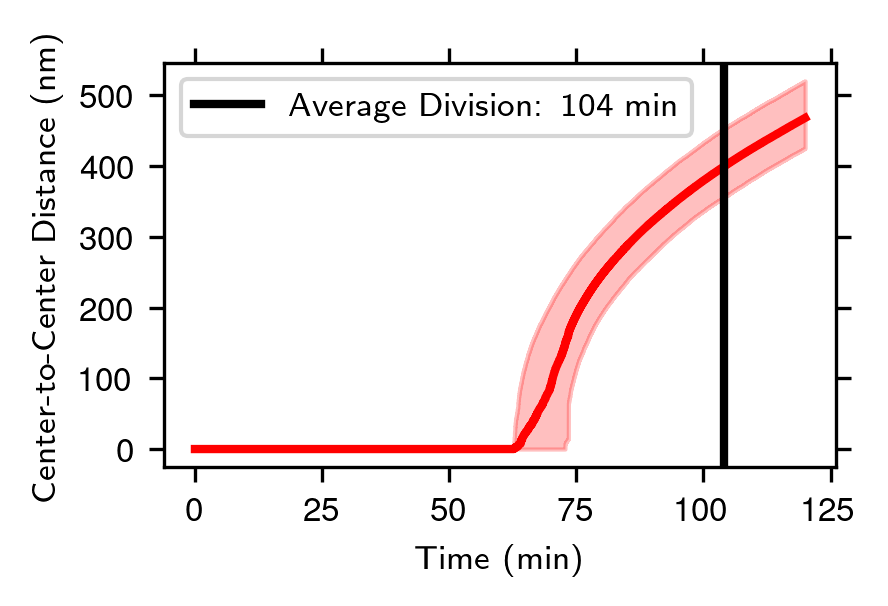

In [19]:
plt.rcParams.update({'font.size': 8})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3,2))
fig = plt.figure(figsize=(3,2))

ax = plt.gca()

ax.plot(t/60, 2*np.average(divH_all, axis=0),color='red',lw=2)

ax.fill_between(t/60, 2*np.percentile(divH_all, 1, axis=0), 2*np.percentile(divH_all, 99, axis=0), color='red', alpha=0.25)

avg_div_times = np.argwhere(np.average(divH_all, axis=0)>200)
avg_div_time = min(avg_div_times)/60
avg_div_time = round_sig(avg_div_time[0],3)

ax.axvline(avg_div_time, linewidth=2, color='k', label='Average Division: {} min'.format(int(avg_div_time)))

ax.set_ylabel('Center-to-Center Distance (nm)')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

ax.legend()

plt.tight_layout()

plt.savefig(f'{figDir}c2c.png')

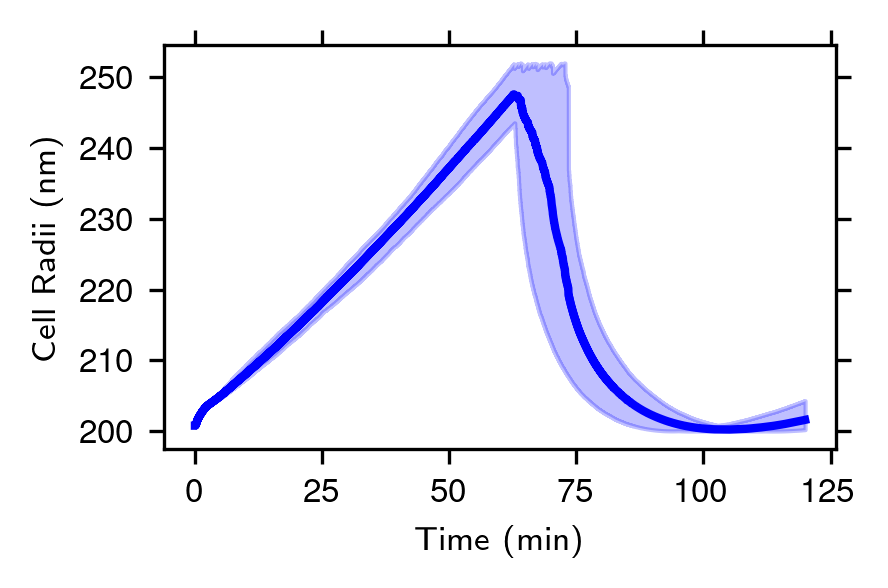

In [20]:
plt.rcParams.update({'font.size': 8})
# plt.rcParams.update({"font.family": 'sans-serif'})

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(3, 2))

ax = plt.gca()

ax.plot(t/60, np.average(divR_all, axis=0),color='blue',lw=2)

ax.fill_between(t/60, np.percentile(divR_all, 1, axis=0), np.percentile(divR_all, 99, axis=0), color='blue', alpha=0.25)


ax.set_ylabel('Cell Radii (nm)')
ax.set_xlabel('Time (min)')

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.tight_layout()

plt.savefig(f'{figDir}cell_radii.png')

455


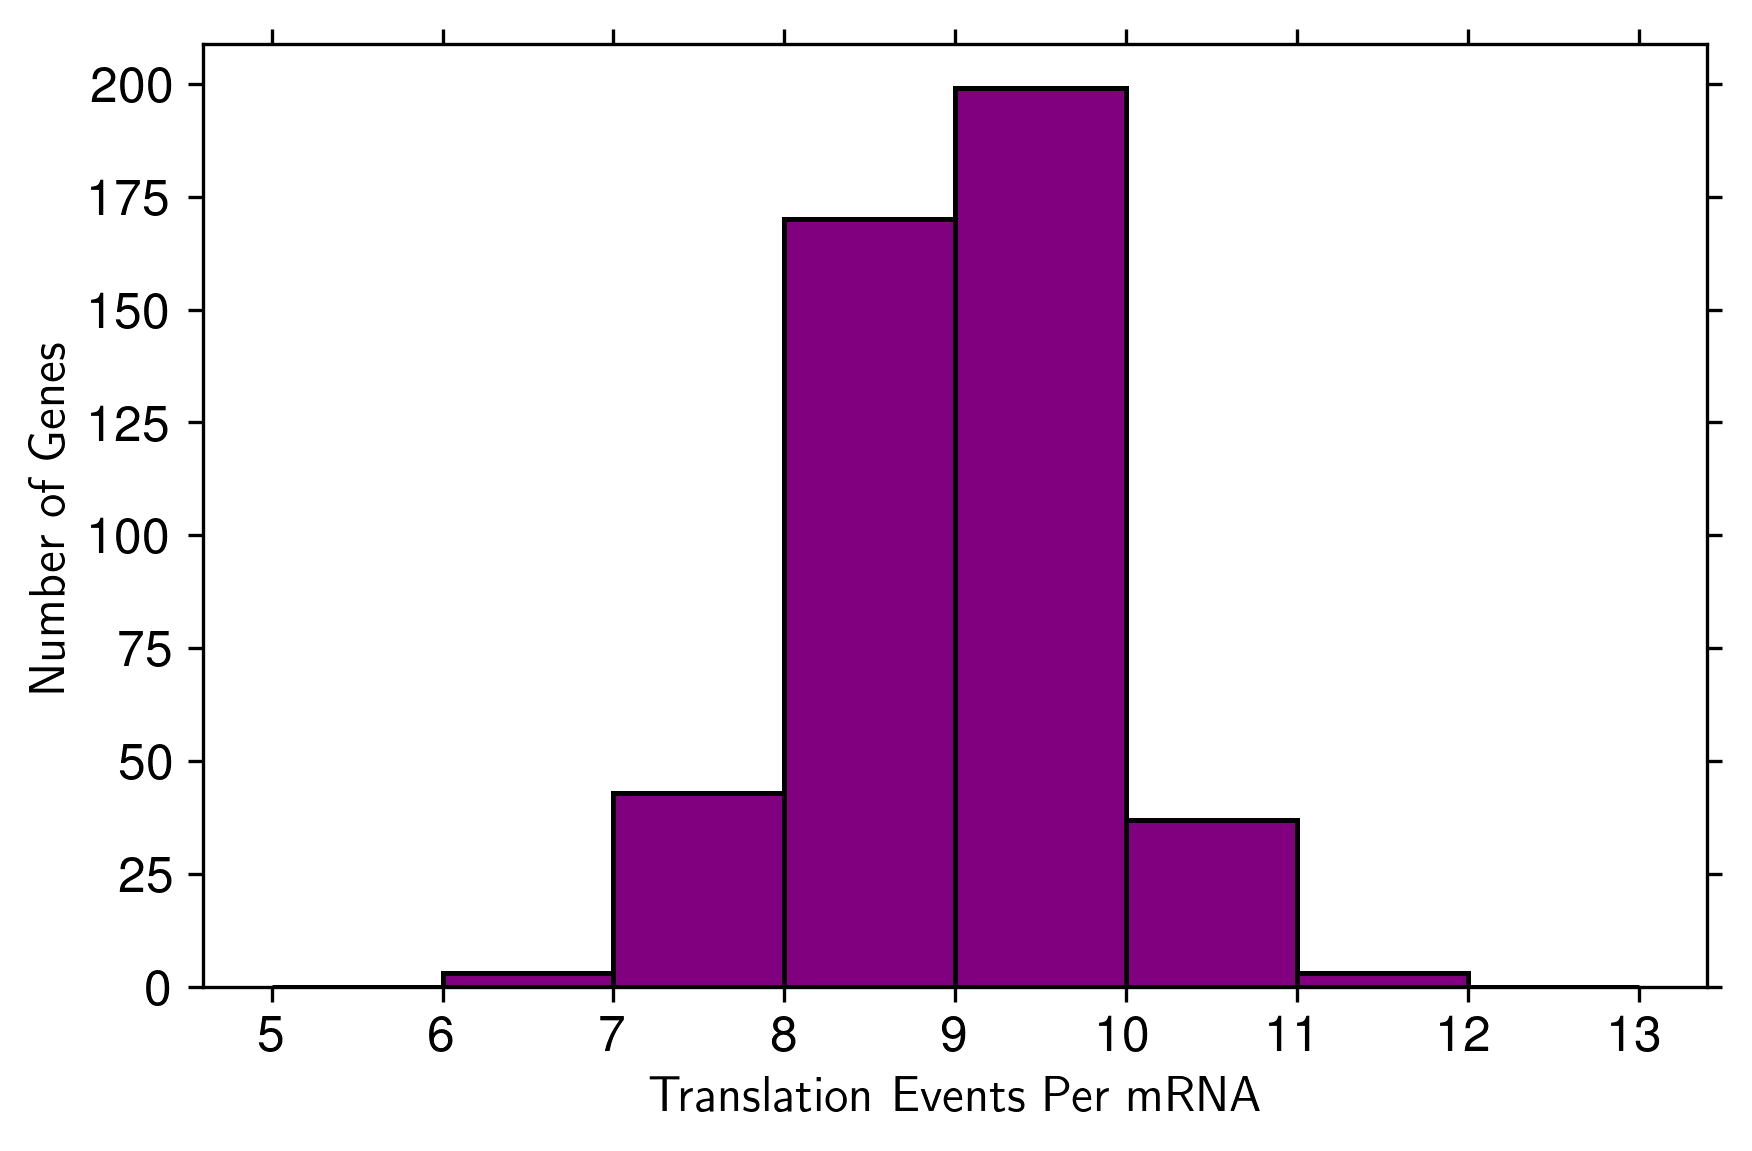

In [21]:
plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

ribo_avg = np.zeros(len(t))

protPerMrna = []

total_counted = 0

for specID in specList:
    
    if specID.startswith('PM_'):
        
        locusNum = specID.split('_')[1]
        
        protID = 'PM_' + locusNum
        RPMID = 'RPM_' + locusNum

        protTrace = w.get_avg_species_traces([protID])
        RPMTrace = w.get_avg_species_traces([RPMID])
        
        protPerMrna.append(round_sig(protTrace[0][-1]/RPMTrace[0][-1],3))
        
        total_counted = total_counted + 1
        
print(total_counted)
        
bins = [x for x in range(5,14)]
ax.hist(protPerMrna,color='purple', edgecolor='k', linewidth=1.2, bins=bins)

ax.set_xlabel('Translation Events Per mRNA')
ax.set_ylabel('Number of Genes')

# ax.set_xscale('log')

# ax.set_xlim(0.9,300)

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.tight_layout()

plt.savefig(f'{figDir}translation_per_mRNA.png')

In [22]:
geneReads = {}

for gene, gd in genome.items():
    
    if gd['Type'] == 'protein':
        
        geneReads[gene] = {}
        geneReads[gene]['rp1'] = []
        geneReads[gene]['rp2'] = []
        
#         print(gene)
        locus = gene.split('_')[1]
        
        g1 = f'G_{locus}_C1'
        g2 = f'G_{locus}_C2'
        
        rp1 = f'RP_{locus}_C1'
        rp2 = f'RP_{locus}_C2'
        
        rpf1 = f'RP_{locus}_f_C1'
        rpf2 = f'RP_{locus}_f_C2'
        
#         totGeneTrace = np.sum(w.get_avg_species_traces([g1,g2,rp1,rp2,rpf1,rpf2]),axis=0)
#         print(np.min(np.argwhere(totGeneTrace>=1.99)))

        g1Traces = w.get_species_traces([g1])[0].T
        g2Traces = w.get_species_traces([g2])[0].T
        
        rp1Traces = w.get_species_traces([rp1])[0].T
        rp2Traces = w.get_species_traces([rp2])[0].T
        
        for rep in range(len(reps)):
        
            totG = np.array([g1Traces[rep],g2Traces[rep],rp1Traces[rep],rp2Traces[rep]]).sum(axis=0)
            g2t = int(np.argwhere(totG>1.99)[0])
            
            rp1Times = 0
            rp2Times = 0
            
            for ct in range(g2t,totalTime):
                
                if rp1Traces[rep][ct]>rp1Traces[rep][ct-1]:
                    
                    rp1Times+=1
                    
                if rp2Traces[rep][ct]>rp2Traces[rep][ct-1]:
                    
                    rp2Times+=1
                    
            geneReads[gene]['rp1'].append(rp1Times)
            geneReads[gene]['rp2'].append(rp2Times)
            
geneReads

{'JCVISYN3A_0001': {'rp1': [8,
   3,
   9,
   7,
   5,
   11,
   8,
   5,
   9,
   8,
   8,
   13,
   12,
   13,
   10,
   5,
   8,
   7,
   9,
   11],
  'rp2': [7, 8, 8, 10, 12, 7, 7, 7, 6, 5, 7, 7, 8, 11, 4, 7, 3, 10, 8, 9]},
 'JCVISYN3A_0002': {'rp1': [12,
   11,
   13,
   12,
   10,
   9,
   15,
   11,
   11,
   14,
   14,
   22,
   8,
   13,
   12,
   8,
   10,
   7,
   16,
   6],
  'rp2': [15,
   12,
   11,
   8,
   9,
   14,
   16,
   10,
   12,
   12,
   12,
   16,
   10,
   13,
   7,
   8,
   9,
   8,
   13,
   11]},
 'JCVISYN3A_0003': {'rp1': [3,
   5,
   6,
   4,
   5,
   1,
   12,
   10,
   2,
   3,
   5,
   7,
   3,
   3,
   6,
   7,
   4,
   5,
   5,
   2],
  'rp2': [8, 2, 7, 3, 3, 5, 6, 6, 3, 1, 4, 5, 4, 3, 2, 4, 1, 3, 2, 4]},
 'JCVISYN3A_0004': {'rp1': [0,
   6,
   1,
   3,
   1,
   4,
   1,
   5,
   1,
   4,
   4,
   8,
   4,
   3,
   4,
   3,
   4,
   1,
   0,
   2],
  'rp2': [4, 6, 1, 1, 2, 0, 3, 1, 2, 2, 5, 3, 1, 3, 4, 5, 4, 1, 3, 3]},
 'JCVISYN3A_0005': {'rp1': [4,

JCVISYN3A_0025 2.35
JCVISYN3A_0361 -2.3
JCVISYN3A_0499 -2.15
JCVISYN3A_0545 2.5
JCVISYN3A_0607 2.35
JCVISYN3A_0644 -2.55
JCVISYN3A_0646 2.9
JCVISYN3A_0648 2.8
JCVISYN3A_0655 2.15
JCVISYN3A_0664 2.1
JCVISYN3A_0666 -3.5
JCVISYN3A_0669 2.35
JCVISYN3A_0670 -2.8
JCVISYN3A_0729 2.45
JCVISYN3A_0840 2.7


<Figure size 1800x1200 with 0 Axes>

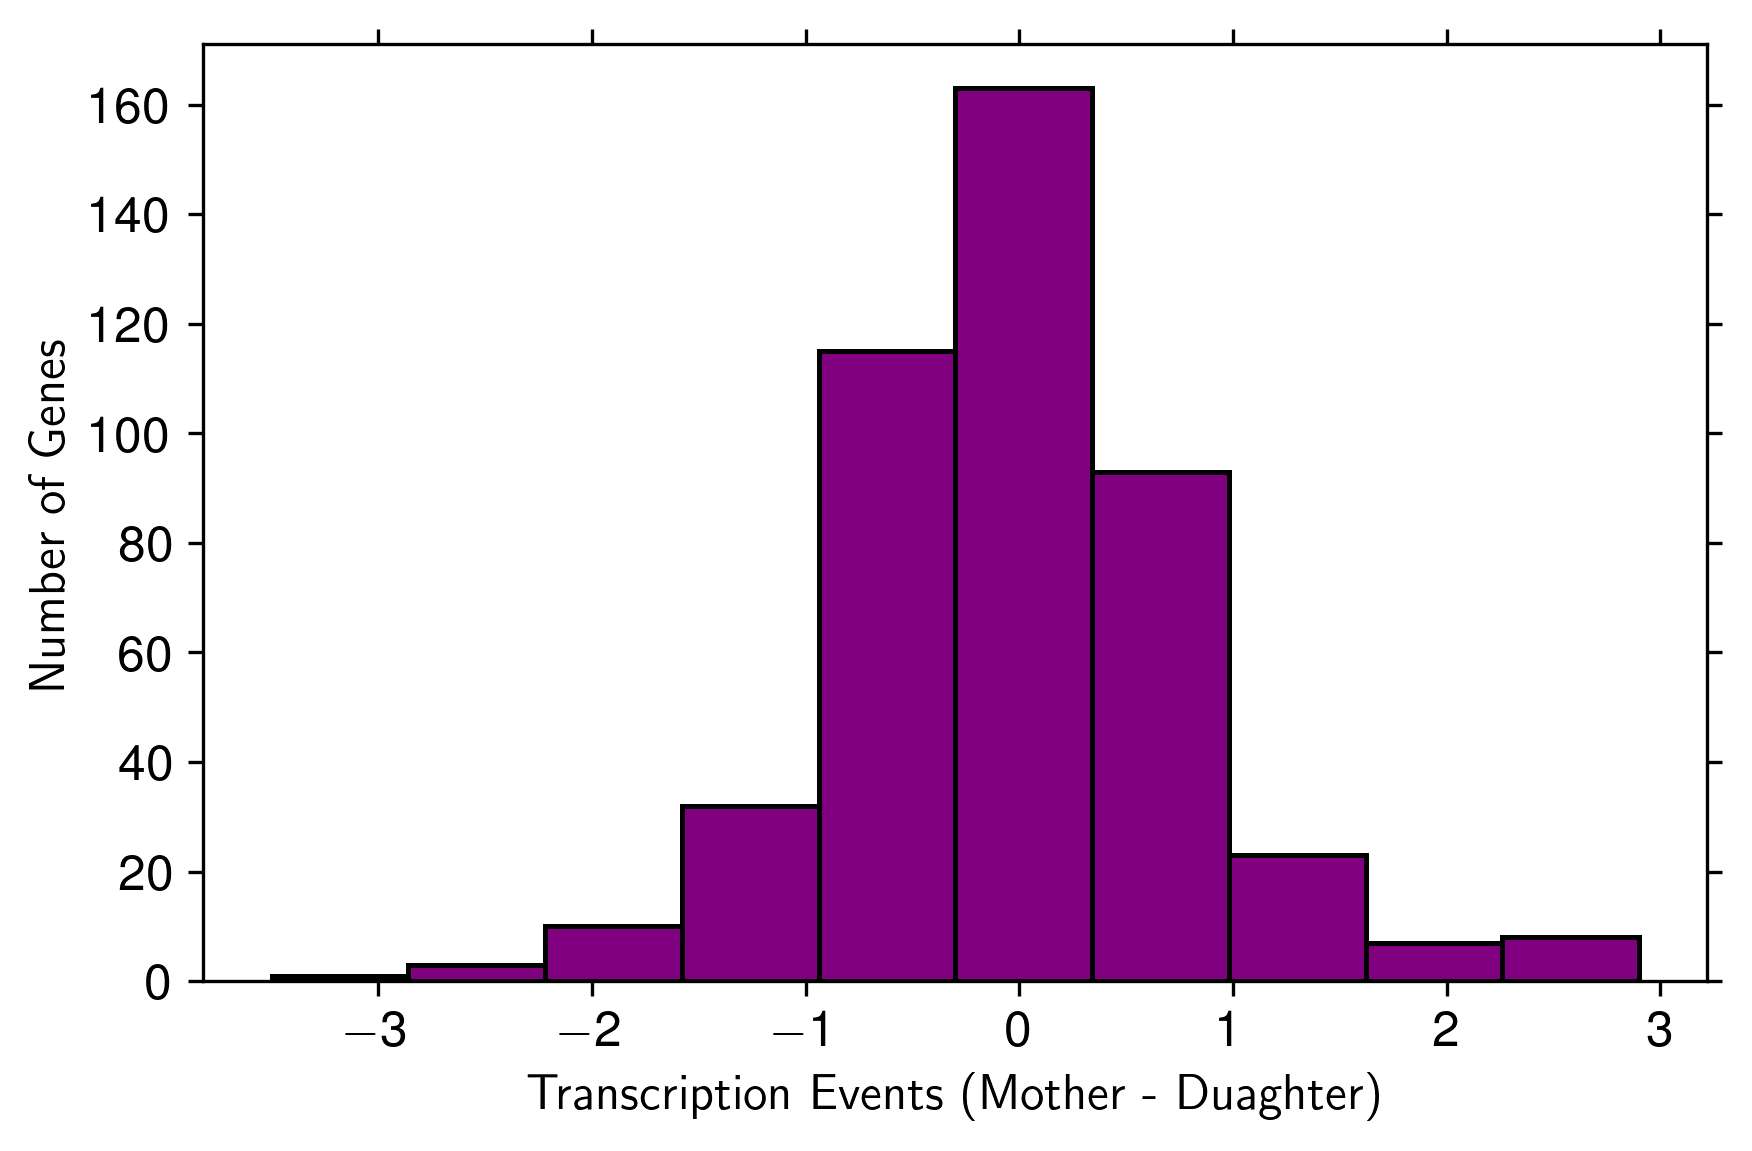

In [23]:
gene_trsc_diffs = []

for gene, gd in geneReads.items():
    
    totDiff = 0
    totEvents = 0
    
    for i in range(len(reps)):
        
        diff = (gd['rp1'][i] - gd['rp2'][i])
        events = (gd['rp1'][i] + gd['rp2'][i])
        
        totDiff += diff
        totEvents += events
        
    fracDiff = totDiff/totEvents
    totDiff = totDiff/len(reps)
    
    if totDiff>2 or totDiff<-2:
        
        print(gene, totDiff)
    
    gene_trsc_diffs.append(totDiff)
    
plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))
    
fig = plt.figure(figsize=(6,4))

ax = plt.gca()
    
# bins = [x for x in range(-7,7)]
ax.hist(gene_trsc_diffs, color='purple', edgecolor='k', linewidth=1.2) #, bins=bins)

ax.set_xlabel('Transcription Events (Mother - Duaghter)')
ax.set_ylabel('Number of Genes')

# ax.set_xscale('log')

# ax.set_xlim(0.9,300)

ax.tick_params(top=True, bottom=True, left=True, right=True)

plt.tight_layout()

plt.savefig(f'{figDir}mother_daughter_trsc.png')

Text(0, 0.5, 'mRNA Types')

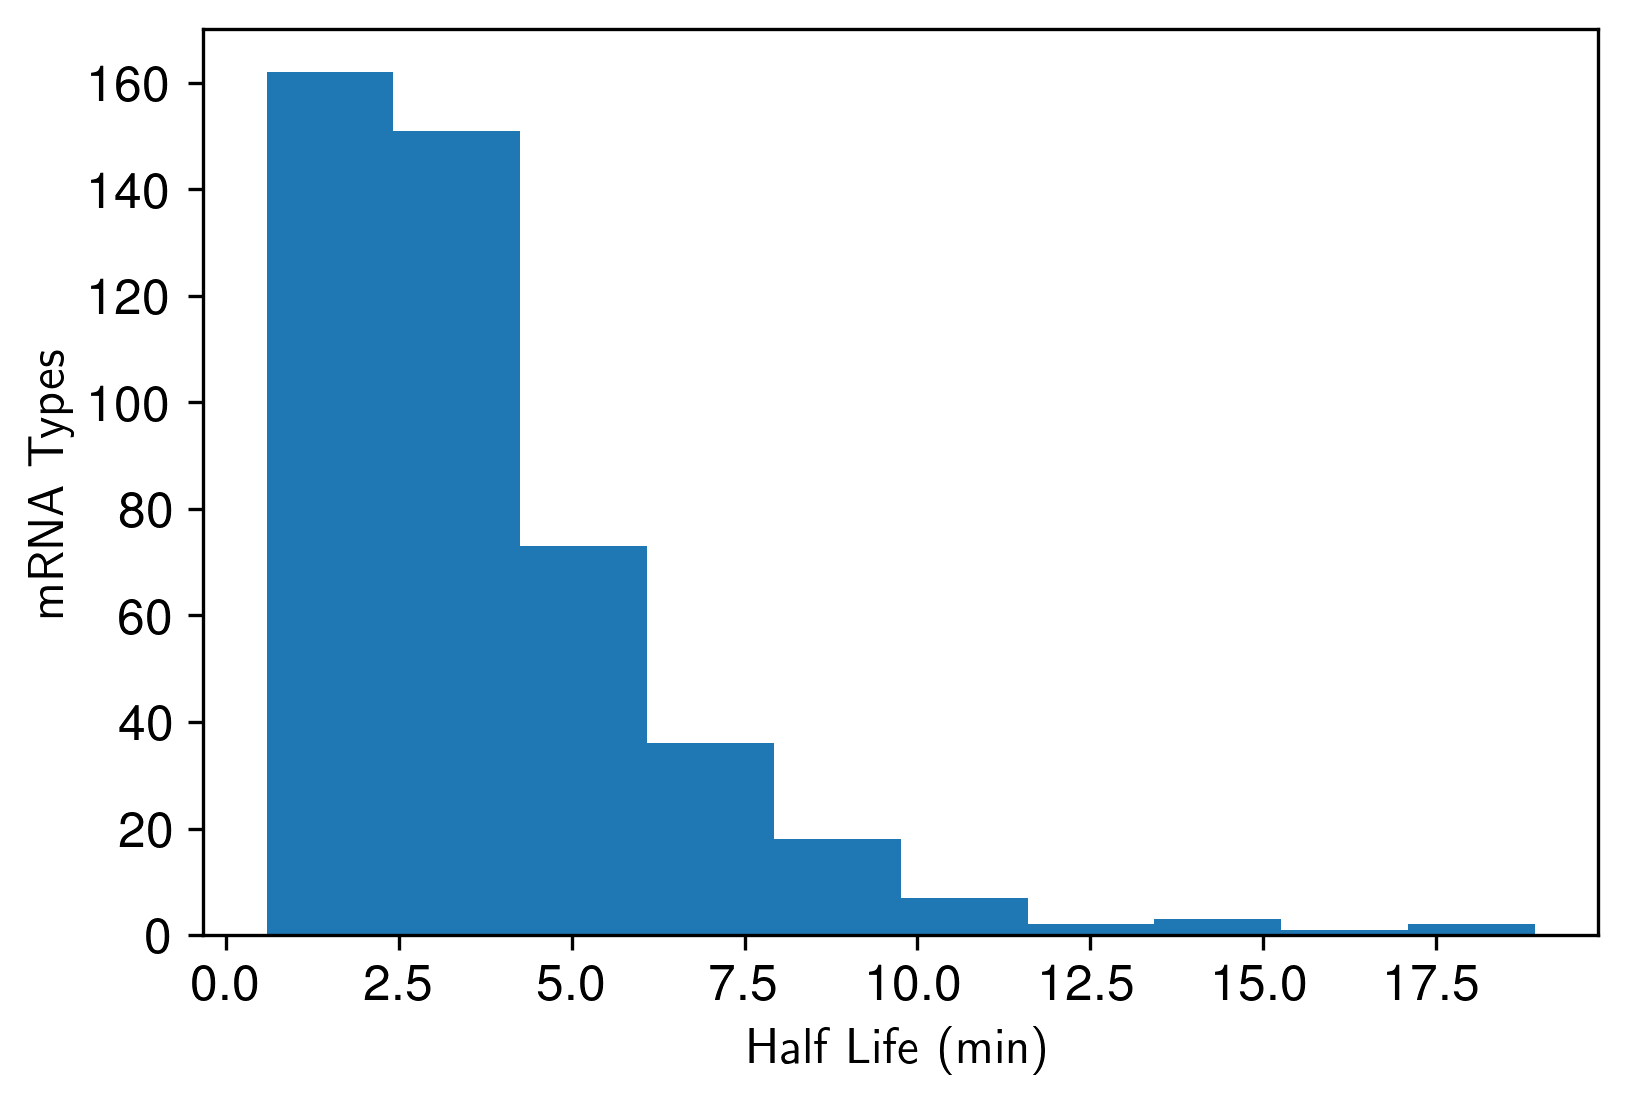

In [24]:
half_lives = []
mrna_counts = []

for specID in specList:
    
    if specID.startswith('DM_'):
        
        locusNum = specID.split('_')[1]
#         print(locusNum)
        
        degTrace = w.get_avg_species_traces([specID])
        
        degRate = degTrace[0][-1]/t[-1]
#         print(degTrace[0][-1])
#         print(degRate)
        
        riboTrace = w.get_avg_species_traces([f'RB_{locusNum}'])
        rnaTrace = w.get_avg_species_traces([f'R_{locusNum}'])
        
        rnaTotTrace = np.add(riboTrace[0],rnaTrace[0])

        total_deg = degTrace[-1]
        
        rna_avg_count = np.average(rnaTotTrace[600:])
#         print(rna_avg_count)
        mrna_counts.append(rna_avg_count)

        half_life = np.log(2)/(degRate/rna_avg_count)/60
#         print(half_life)
        
        half_lives.append(half_life)
        
#         print()

plt.hist(half_lives)

plt.xlabel('Half Life (min)')
plt.ylabel('mRNA Types')


JCVISYN3A_0008 10.0 Nucleoside ABC transporter permease 978 5.2
JCVISYN3A_0918 9.0 Imidazoleglycerol-phosphate dehydratase 663 6.2
JCVISYN3A_0913 9.0 Tetracycline resistance ribosomal protection protein 1920 4.9
JCVISYN3A_0034 10.0 Uncharacterized efflux ABC transporter permease 5388 2.6
JCVISYN3A_0043 21.0 Uncharacterized methyltransferase 723 2.8
JCVISYN3A_0060 10.0 Uncharacterized protein 825 6.4
JCVISYN3A_0077 9.0 Uncharacterized hydrolase 840 4.9
JCVISYN3A_0080 25.0 Uncharacterized protein 222 2.8
JCVISYN3A_0094 9.0 Uncharacterized protein 717 6.3
JCVISYN3A_0105 9.0 Exodeoxyribonuclease VII small subunit 216 6.2
JCVISYN3A_0106 14.0 Exodeoxyribonuclease VII large subunit 1410 4.0
JCVISYN3A_0107 18.0 Transcription antitermination factor 399 4.0
JCVISYN3A_0109 21.0 Deoxyribonuclease IV 870 3.0
JCVISYN3A_0128 21.0 DNA-directed RNA polymerase subunit delta 429 2.8
JCVISYN3A_0142 15.0 Protein-(glutamine-N5) methyltransferase, release factor-specific 849 4.1
JCVISYN3A_0146 28.0 Uncharact

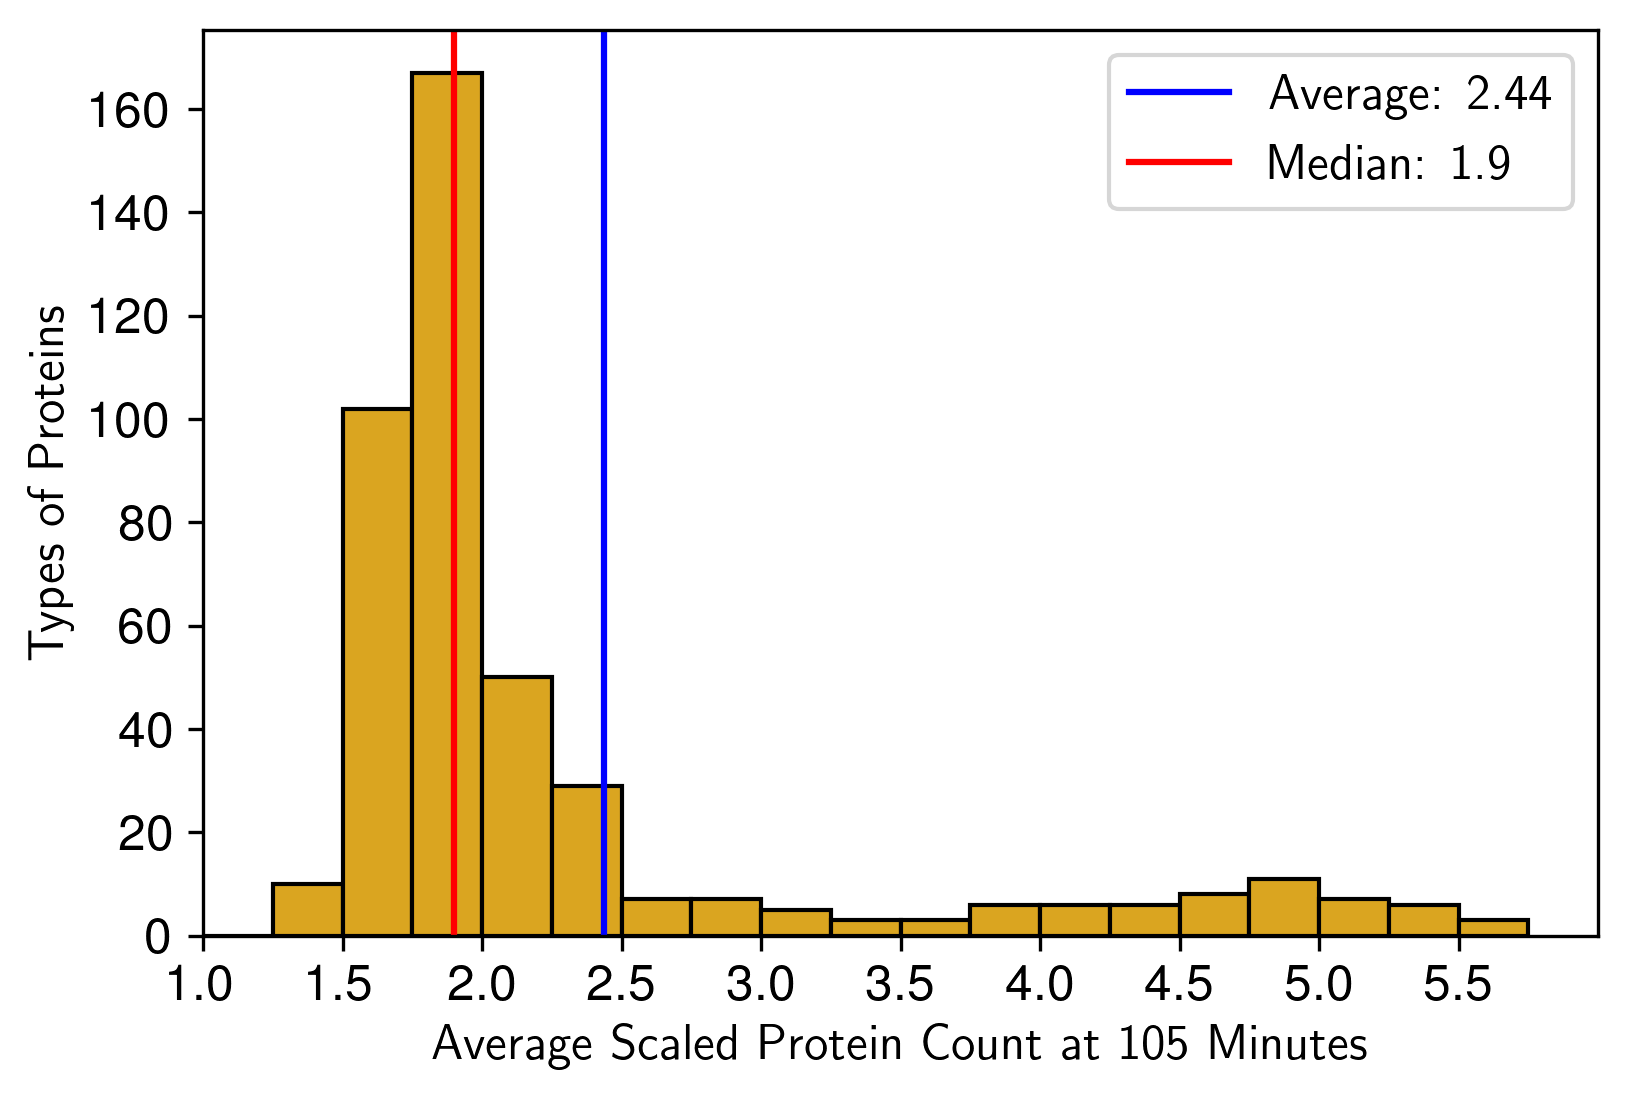

In [25]:
all_ptns_dist = []

for locusTag, locusDict in genome.items():
    
    if locusDict['Type'] == 'protein':
        
        if 'S ribosomal' not in locusDict['GeneName']:

            ptnID = 'P_' + locusTag.split('_')[1]
            
            Spec = [ptnID]
            
            avg = w.get_avg_species_traces(Spec)
            
            if avg[0][0]>1:
            
                ptnmID = 'PM_' + locusTag.split('_')[1]

                Spec = [ptnmID]
                
                avgM = w.get_avg_species_traces(Spec) + avg[0][0]
                
                scaled = avgM[0][int(105*60)]/avg[0][0]
                
                if scaled>2.5:
                    print(locusTag, avg[0][0], locusDict['GeneName'], len(locusDict['RNAsequence']), round_sig(scaled, sig=2))
                    
                if scaled<1.5:
                    print(locusTag, avg[0][0], locusDict['GeneName'], len(locusDict['RNAsequence']), round_sig(scaled, sig=2))
                
                all_ptns_dist.append(scaled)
                
        if 'S ribosomal' in locusDict['GeneName']:
            
#             print('Ribo', ptnID)
            
            ptnID = 'P_' + locusTag.split('_')[1]
            
            Spec = [ptnID]
            
            avg = w.get_avg_species_traces(Spec)
            
            avg_start = avg[0][0] + 500
            
            ptnmID = 'PM_' + locusTag.split('_')[1]

            Spec = [ptnmID]

            avgM = w.get_avg_species_traces(Spec) + avg_start

            scaled = avgM[0][int(105*60)]/avg_start

            if scaled>2.5:
                print('Ribo')
                print(locusTag, avg[0][0], locusDict['GeneName'], len(locusDict['RNAsequence']), round_sig(scaled, sig=2))

            if scaled<1.5:
                print('Ribo')
                print(locusTag, avg[0][0], locusDict['GeneName'], len(locusDict['RNAsequence']), round_sig(scaled, sig=2))

            all_ptns_dist.append(scaled)
                
                
bins = [x*0.25 for x in range(0,int(6/0.25))]
        
plt.hist(all_ptns_dist, color='goldenrod', edgecolor='k', bins=bins, linewidth=1)

avg_ptns = np.average(np.array(all_ptns_dist))
median_ptns = np.median(np.array(all_ptns_dist))

plt.axvline(avg_ptns, color='blue', label=f"Average: {round_sig(avg_ptns,3)}")
plt.axvline(median_ptns, color='red', label=f"Median: {round_sig(median_ptns,3)}")

plt.xlim(1,6)
plt.xticks(np.arange(1, 6, step=0.5))

plt.xlabel('Average Scaled Protein Count at 105 Minutes')
plt.ylabel('Types of Proteins')

plt.legend()

['PM_0025'] 741.05
['PM_0027'] 502.05
['PM_0082'] 688.75
['PM_0137'] 552.65
['PM_0148'] 623.95
['PM_0149'] 693.45
['PM_0198'] 696.4
['PM_0199'] 505.1
['PM_0238'] 562.05
['PM_0294'] 562.1
['PM_0362'] 633.4
['PM_0365'] 599.4
['PM_0422'] 538.6
['PM_0482'] 481.8
['PM_0499'] 549.45
['PM_0501'] 647.05
['PM_0930'] 434.45
['PM_0526'] 494.35
['PM_0540'] 611.75
['PM_0637'] 724.85
['PM_0638'] 674.8
['PM_0644'] 575.55
['PM_0646'] 633.95
['PM_0647'] 727.3
['PM_0648'] 507.6
['PM_0653'] 777.45
['PM_0654'] 594.95
['PM_0655'] 670.8
['PM_0656'] 674.35
['PM_0657'] 702.8
['PM_0658'] 768.6
['PM_0659'] 733.25
['PM_0660'] 734.45
['PM_0661'] 617.45
['PM_0662'] 729.6
['PM_0663'] 747.7
['PM_0664'] 605.1
['PM_0665'] 657.55
['PM_0666'] 679.15
['PM_0667'] 754.5
['PM_0668'] 527.0
['PM_0669'] 721.25
['PM_0670'] 670.8
['PM_0671'] 649.0
['PM_0672'] 693.9
['PM_0806'] 792.3
['PM_0807'] 732.45
['PM_0809'] 718.65
['PM_0810'] 730.55
['PM_0833'] 607.75
['PM_0932'] 551.9
['PM_0910'] 585.95


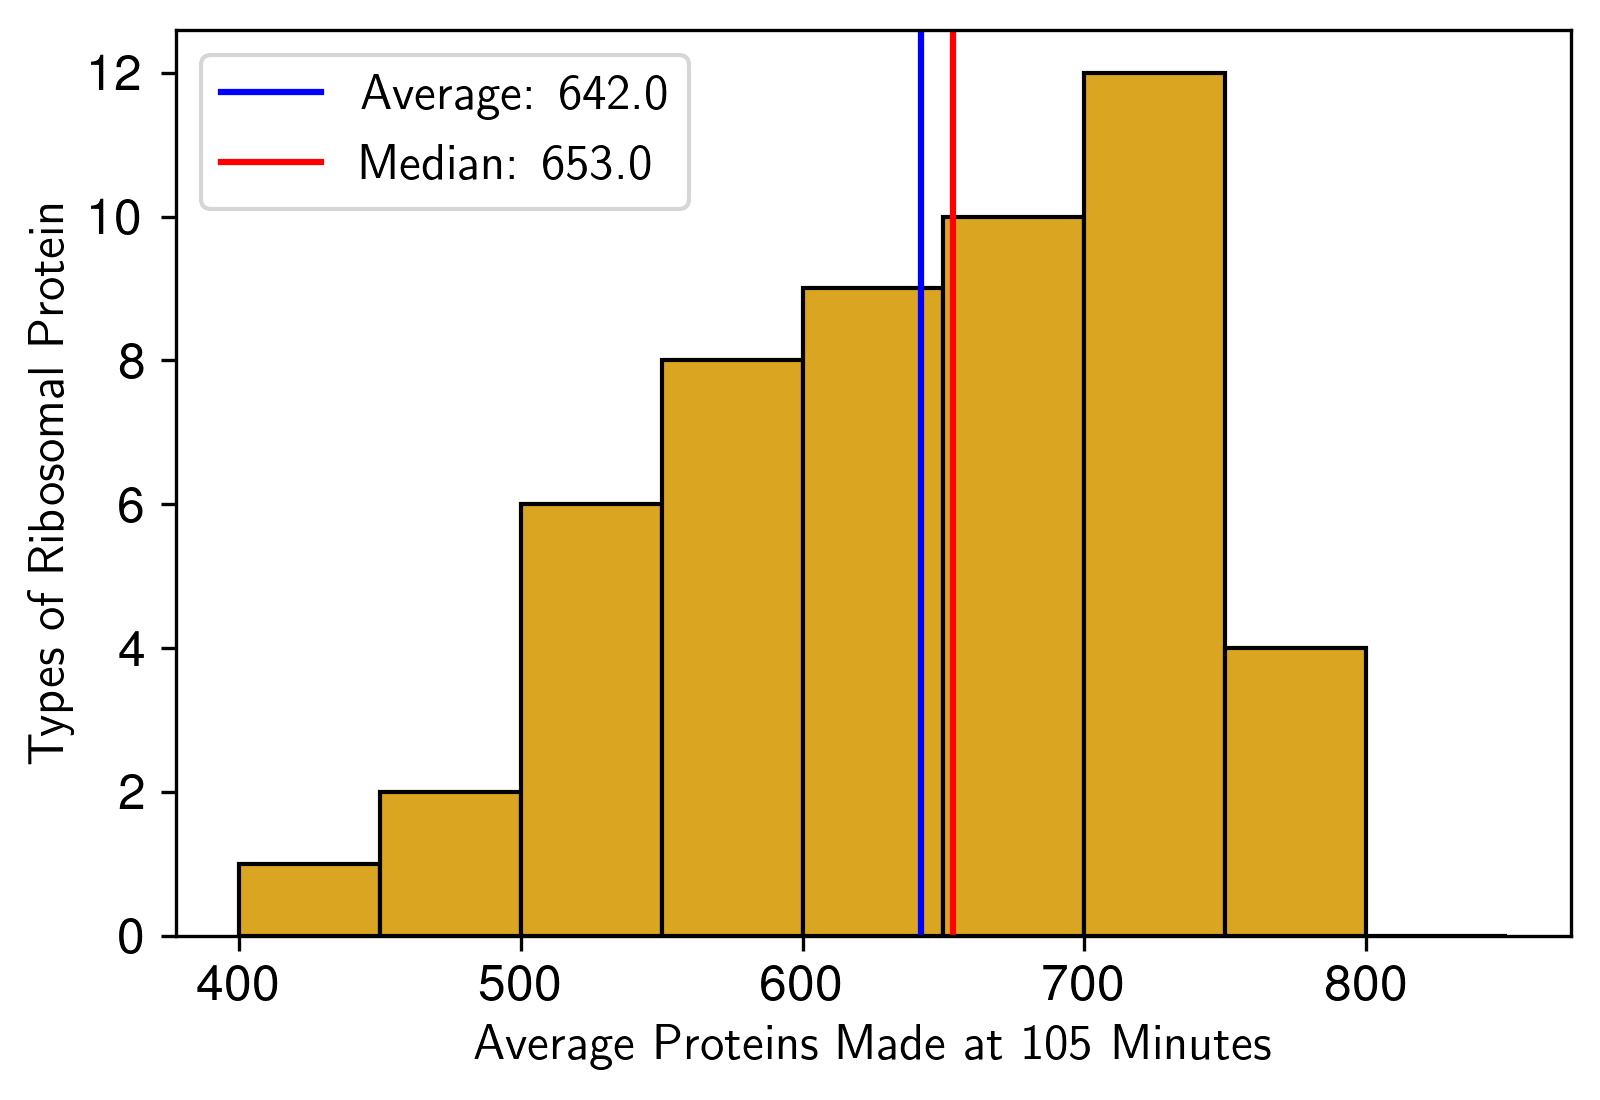

In [26]:
ribo_ptn_dist = []

for locusTag, locusDict in genome.items():
    
    if locusDict['Type'] == 'protein':
        
        if 'S ribosomal' in locusDict['GeneName']:
            
            ptnmID = 'PM_' + locusTag.split('_')[1]

            Spec = [ptnmID]

            avgM = w.get_avg_species_traces(Spec)
            
            print(Spec, avgM[0][int(105*60)])

            ribo_ptn_dist.append(avgM[0][int(105*60)])

bins = [x*50 for x in range(int(400/50),int(900/50))]
            
plt.hist(ribo_ptn_dist, color='goldenrod', edgecolor='k', linewidth=1, bins=bins)

avg_ptns = np.average(np.array(ribo_ptn_dist))
median_ptns = np.median(np.array(ribo_ptn_dist))

plt.axvline(avg_ptns, color='blue', label=f"Average: {round_sig(avg_ptns,3)}")
plt.axvline(median_ptns, color='red', label=f"Median: {round_sig(median_ptns,3)}")

# plt.xlim(1,6)

plt.xlabel('Average Proteins Made at 105 Minutes')
plt.ylabel('Types of Ribosomal Protein')

plt.legend(loc='upper left')

In [27]:
ssuSpec1 = ['R_0069']
ssuSpec2 =['R_0534']
lsuSpec1 = ['R_0068']
lsuSpec2 = ['R_0533']

ssu_avg_tot = w.get_species_traces(ssuSpec1)
ssu2 = w.get_species_traces(ssuSpec2)
ssu_avg_tot = np.add(ssu_avg_tot,ssu2)

lsu_avg_tot = w.get_species_traces(lsuSpec1)
lsu2 = w.get_species_traces(lsuSpec2)
lsu_avg_tot = np.add(lsu_avg_tot,lsu2)

for specID in specList:
    if specID.startswith('Rs'):
        print(specID)
        riboSpec = [specID]

        stateTrace = w.get_species_traces(riboSpec)
        
        ssu_avg_tot = np.add(ssu_avg_tot,stateTrace)
        
    if specID.startswith('RL') or specID.startswith('R5'):
        print(specID)
        riboSpec = [specID]

        stateTrace = w.get_species_traces(riboSpec)
        
        lsu_avg_tot = np.add(lsu_avg_tot,stateTrace)
        
ssu_states = ssu_avg_tot[0].T
lsu_states = lsu_avg_tot[0].T

print(ssu_states.shape, lsu_states.shape)

Rs4s6s15
Rs4s15
Rs4s6s15s17
Rs4s6s8s15s17
Rs4s6s8s15s17s20
Rs4s6s8s15s16s17s20
Rs4s5s6s8s15s16s17s20
Rs4s6s8s11s15s16s17s20
Rs4s5s6s8s11s15s16s17s20
Rs4s5s6s7s8s11s15s16s17s20
Rs4s5s6s7s8s9s11s15s16s17s20
Rs4s5s6s7s8s9s11s13s15s16s17s20
Rs3s4s5s6s7s8s9s10s11s13s14s15s16s17s19s20
Rs3s4s5s6s7s8s9s10s11s13s15s16s17s19s20
Rs4s5s6s7s8s9s10s11s13s15s16s17s20
Rs3s4s5s6s7s8s9s10s11s13s15s16s17s20
Rs3s4s5s6s7s8s9s10s11s12s13s14s15s16s17s19s20
Rs4
RL24
RL20L24
RL20L21L24
RL20L21L22L24
RL17L20L21L22L24
RL17L20L21L22L23L24
RL1L17L20L21L22L23L24
RL1L3L17L20L21L22L23L24
RL1L3L13L17L20L21L22L23L24
RL1L3L4L13L17L20L21L22L23L24
RL1L3L4L13L15L17L20L21L22L23L24
RL1L3L4L13L15L17L18L20L21L22L23L24
RL1L3L4L13L15L17L18L20L21L22L23L24L29
RL1L3L4L5L13L15L17L18L20L21L22L23L24L29
RL1L3L4L5L13L15L17L18L20L21L22L23L24L29L34
RL1L2L3L4L5L13L15L17L18L20L21L22L23L24L29L34
R5SL1L2L3L4L5L13L15L17L18L20L21L22L23L24L29L34
R5SL1L2L3L4L5L13L15L17L18L20L21L22L23L24L29L32L34
R5SL1L2L3L4L5L13L15L17L18L19L20L21L22L23L24L29L32L3

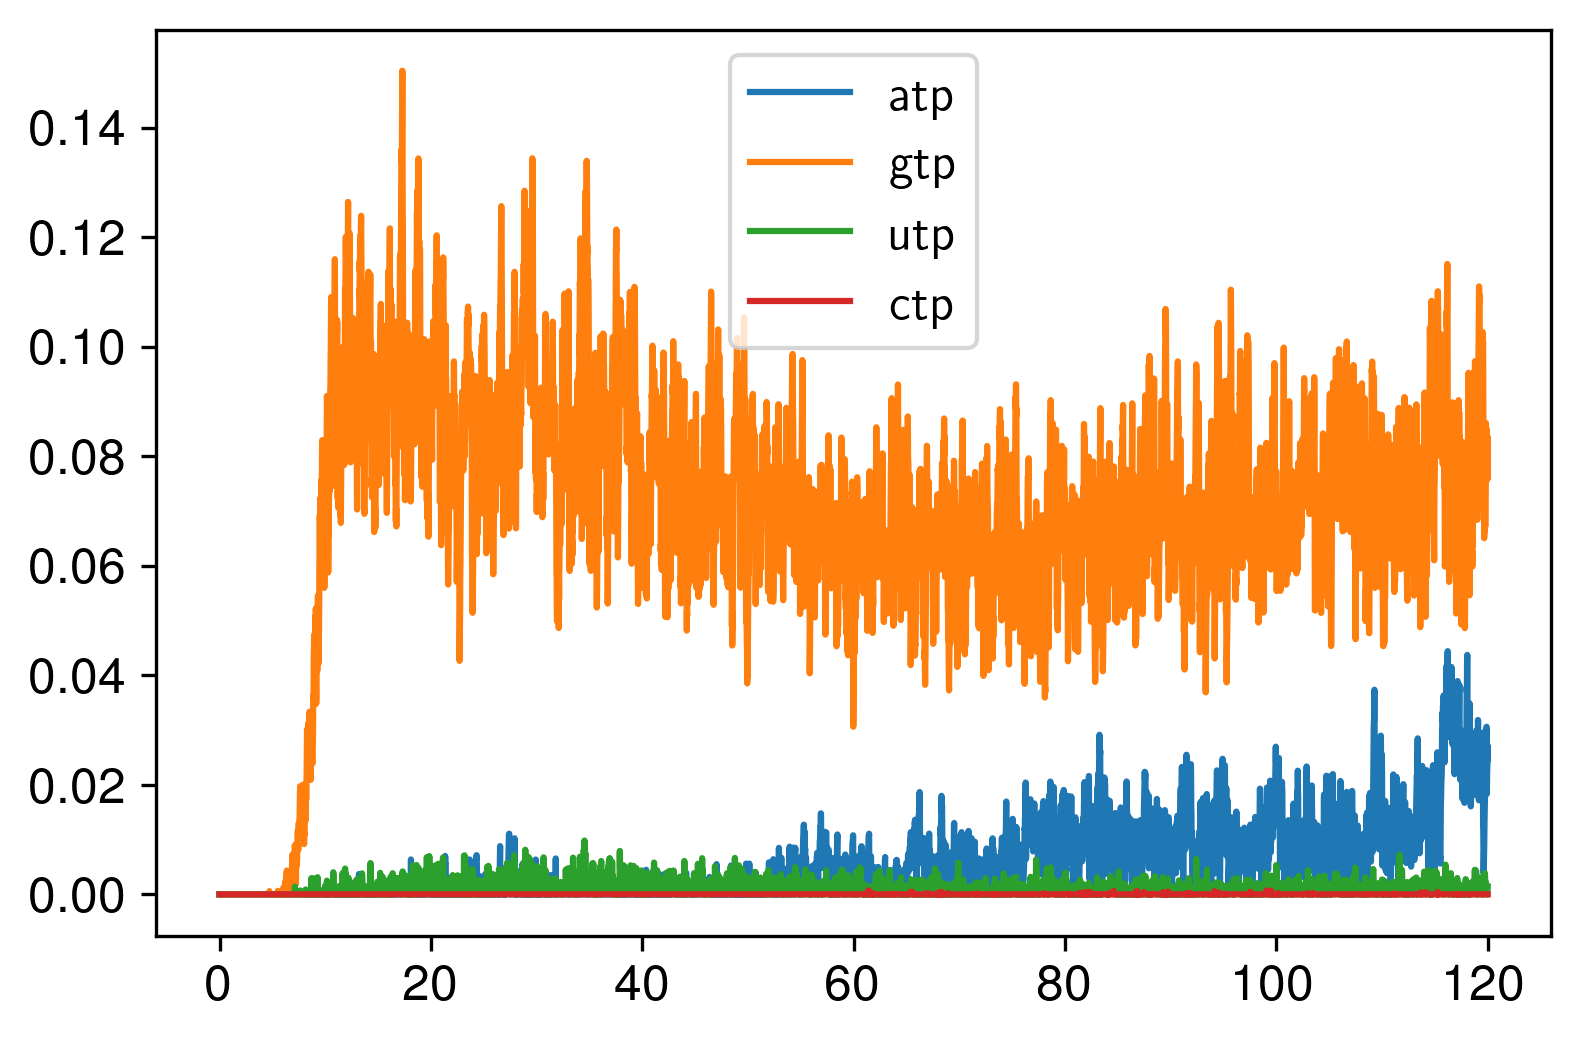

In [89]:
atp = w.get_conc_traces(['ATP_mRNA_cost'])
ctp = w.get_conc_traces(['CTP_mRNA_cost'])
utp = w.get_conc_traces(['UTP_mRNA_cost'])
gtp = w.get_conc_traces(['GTP_mRNA_cost'])

atp = atp[0].T*1e3
ctp = ctp[0].T*1e3
utp = utp[0].T*1e3
gtp = gtp[0].T*1e3

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

ax.plot(t/60,np.average(atp,axis=0),label='atp')
ax.plot(t/60,np.average(gtp,axis=0),label='gtp')
ax.plot(t/60,np.average(utp,axis=0),label='utp')
ax.plot(t/60,np.average(ctp,axis=0),label='ctp')

ax.legend()


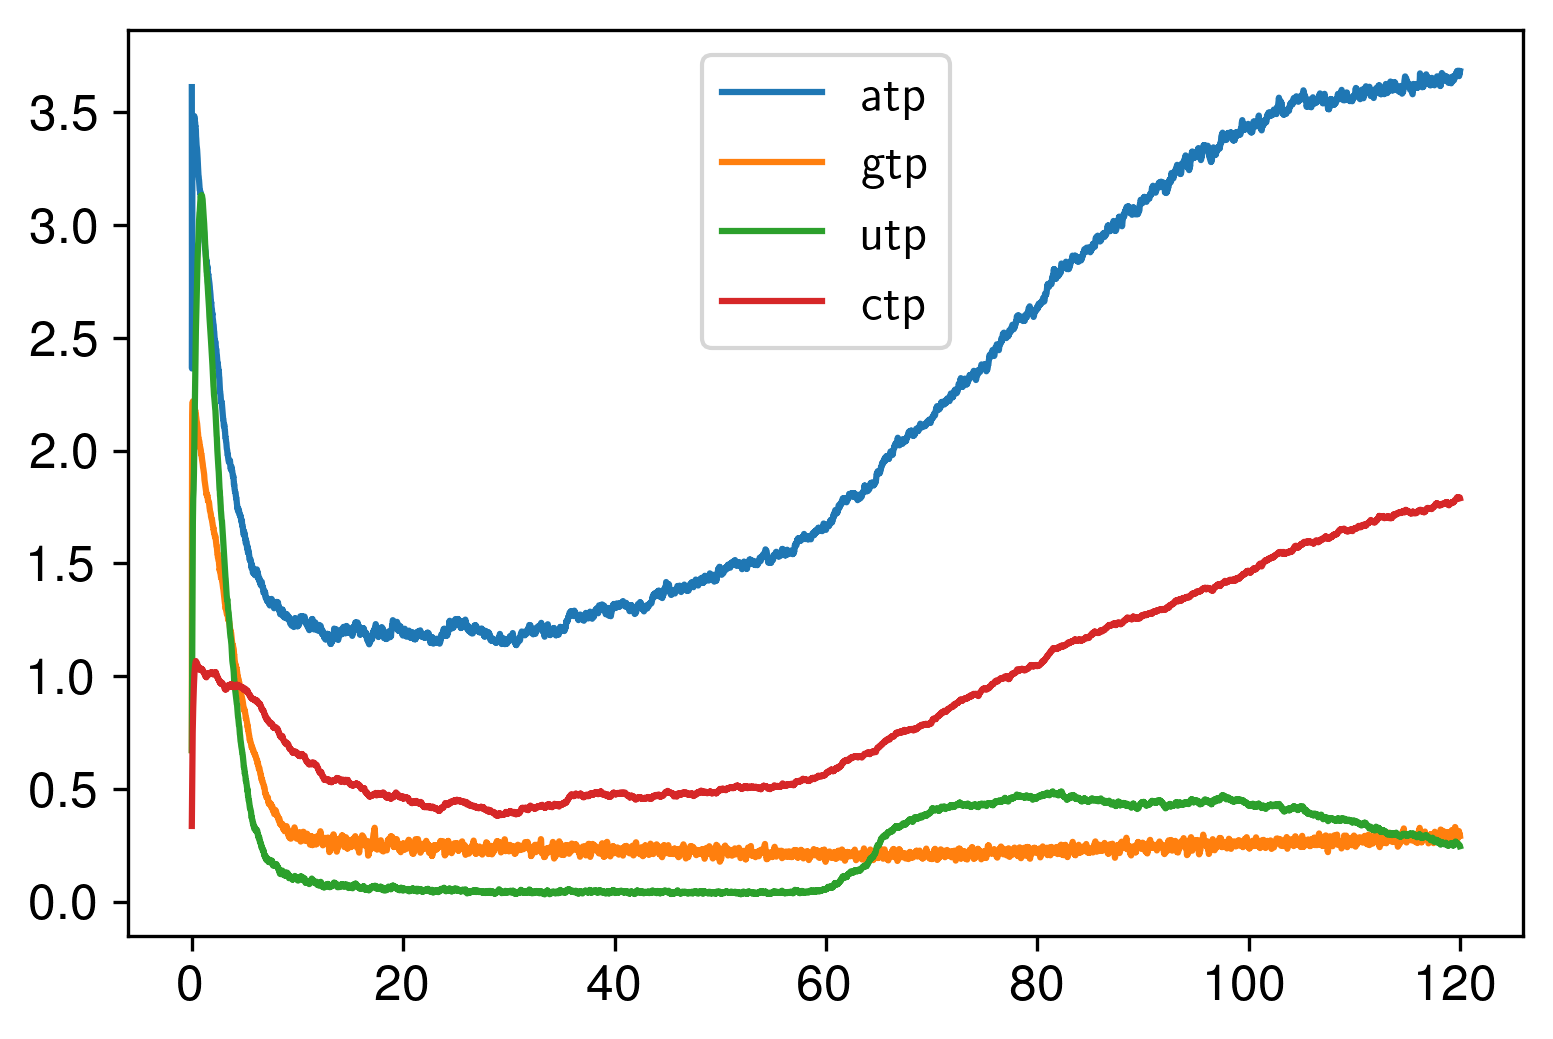

In [84]:
atp = w.get_conc_traces(['M_atp_c'])
ctp = w.get_conc_traces(['M_ctp_c'])
utp = w.get_conc_traces(['M_utp_c'])
gtp = w.get_conc_traces(['M_gtp_c'])

atp = atp[0].T*1e3
ctp = ctp[0].T*1e3
utp = utp[0].T*1e3
gtp = gtp[0].T*1e3

plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
fig = plt.figure(figsize=(6,4))

ax = plt.gca()

ax.plot(t/60,np.average(atp,axis=0),label='atp')
ax.plot(t/60,np.average(gtp,axis=0),label='gtp')
ax.plot(t/60,np.average(utp,axis=0),label='utp')
ax.plot(t/60,np.average(ctp,axis=0),label='ctp')

ax.legend()


593


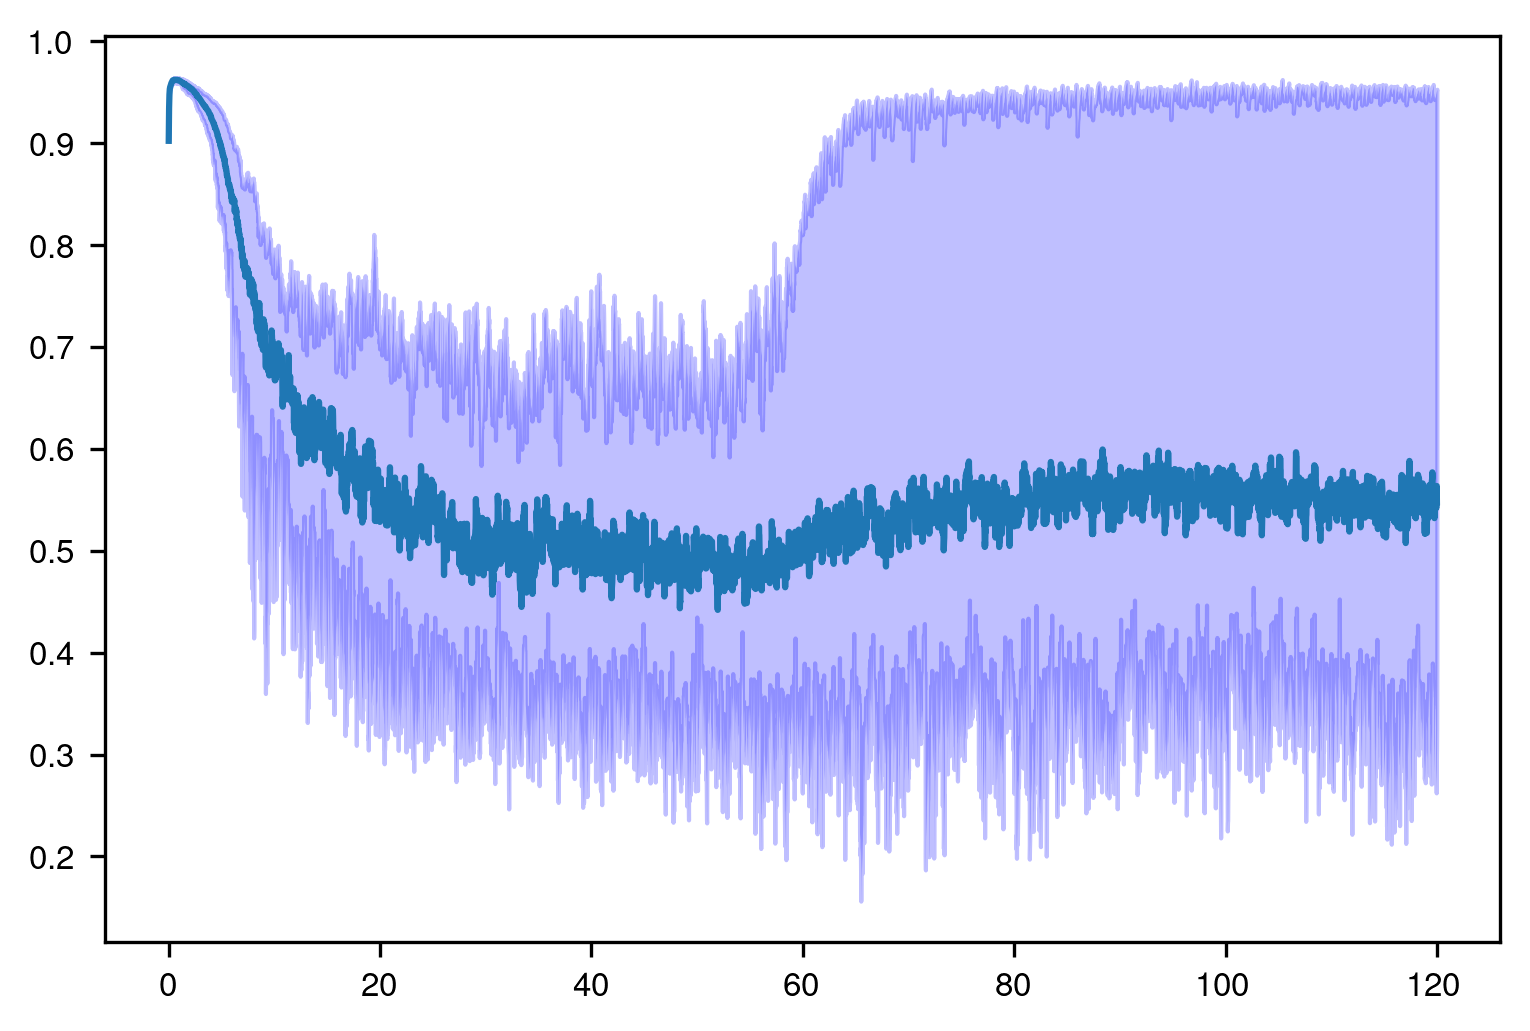

In [63]:
geneDat = genome['JCVISYN3A_0001']
rnasequence = geneDat['RNAsequence']

baseCount = defaultdict(int)
for base in set(rnasequence):
    baseCount[base] = rnasequence.count(base)

NMono_A = baseCount["A"]
    
NMono_U = baseCount["U"]

NMono_C = baseCount["C"]

NMono_G = baseCount["G"]

print(NMono_A)

rnaPolKcat = 20 # nt/s
rnaPolK0 = 1e-4 #mM
rnaPolKd = 0.1 #mM

proxyPromoterStrength = sim_properties['promoters'][locusTag]
    
kcat_mod = min(rnaPolKcat*(proxyPromoterStrength/180),85)

kcat_mod = max(10,kcat_mod)

n_tot = len(rnasequence)


trsc_rates = None

atp = w.get_conc_traces(['M_atp_c'])
ctp = w.get_conc_traces(['M_ctp_c'])
utp = w.get_conc_traces(['M_utp_c'])
gtp = w.get_conc_traces(['M_gtp_c'])

atp = atp[0].T*1e3
ctp = ctp[0].T*1e3
utp = utp[0].T*1e3
gtp = gtp[0].T*1e3


for rep in range(len(reps)):
    
    vol_trace = volumes[rep]
    sa_trace = SA[rep]
    
    atp_trace = atp[rep]
    ctp_trace = ctp[rep]
    utp_trace = utp[rep]
    gtp_trace = gtp[rep]
    
#     print(atp_trace)
    
    trsc_scaled_trace = []

    for i in range(len(atp_trace)):
        
        baseMap = OrderedDict({ "A":atp_trace[i], "U":utp_trace[i], "G":gtp_trace[i], "C":ctp_trace[i] })
        
        CMono1 = baseMap[ rnasequence[0] ]
    
        CMono2 = baseMap[ rnasequence[1] ]
        
        NMonoSum = NMono_A*rnaPolKd/atp_trace[i] + NMono_C*rnaPolKd/ctp_trace[i] + NMono_U*rnaPolKd/utp_trace[i] + NMono_G*rnaPolKd/gtp_trace[i]
        
        k_transcription = kcat_mod / ((rnaPolKd**2)/(CMono1*CMono2) + NMonoSum + n_tot - 1)
        
        k_max = kcat_mod/n_tot
        
        k_ratio = k_transcription/k_max
        trsc_scaled_trace.append(k_ratio)
        
    if trsc_rates is None:
        trsc_rates = np.array(trsc_scaled_trace)
    else:
        trsc_rates = np.vstack([trsc_rates,np.array(trsc_scaled_trace)])

plt.plot(t/60, np.average(trsc_rates,axis=0))
plt.fill_between(t/60, np.percentile(trsc_rates, 1, axis=0), np.percentile(trsc_rates, 99, axis=0), color='blue', alpha=0.25)

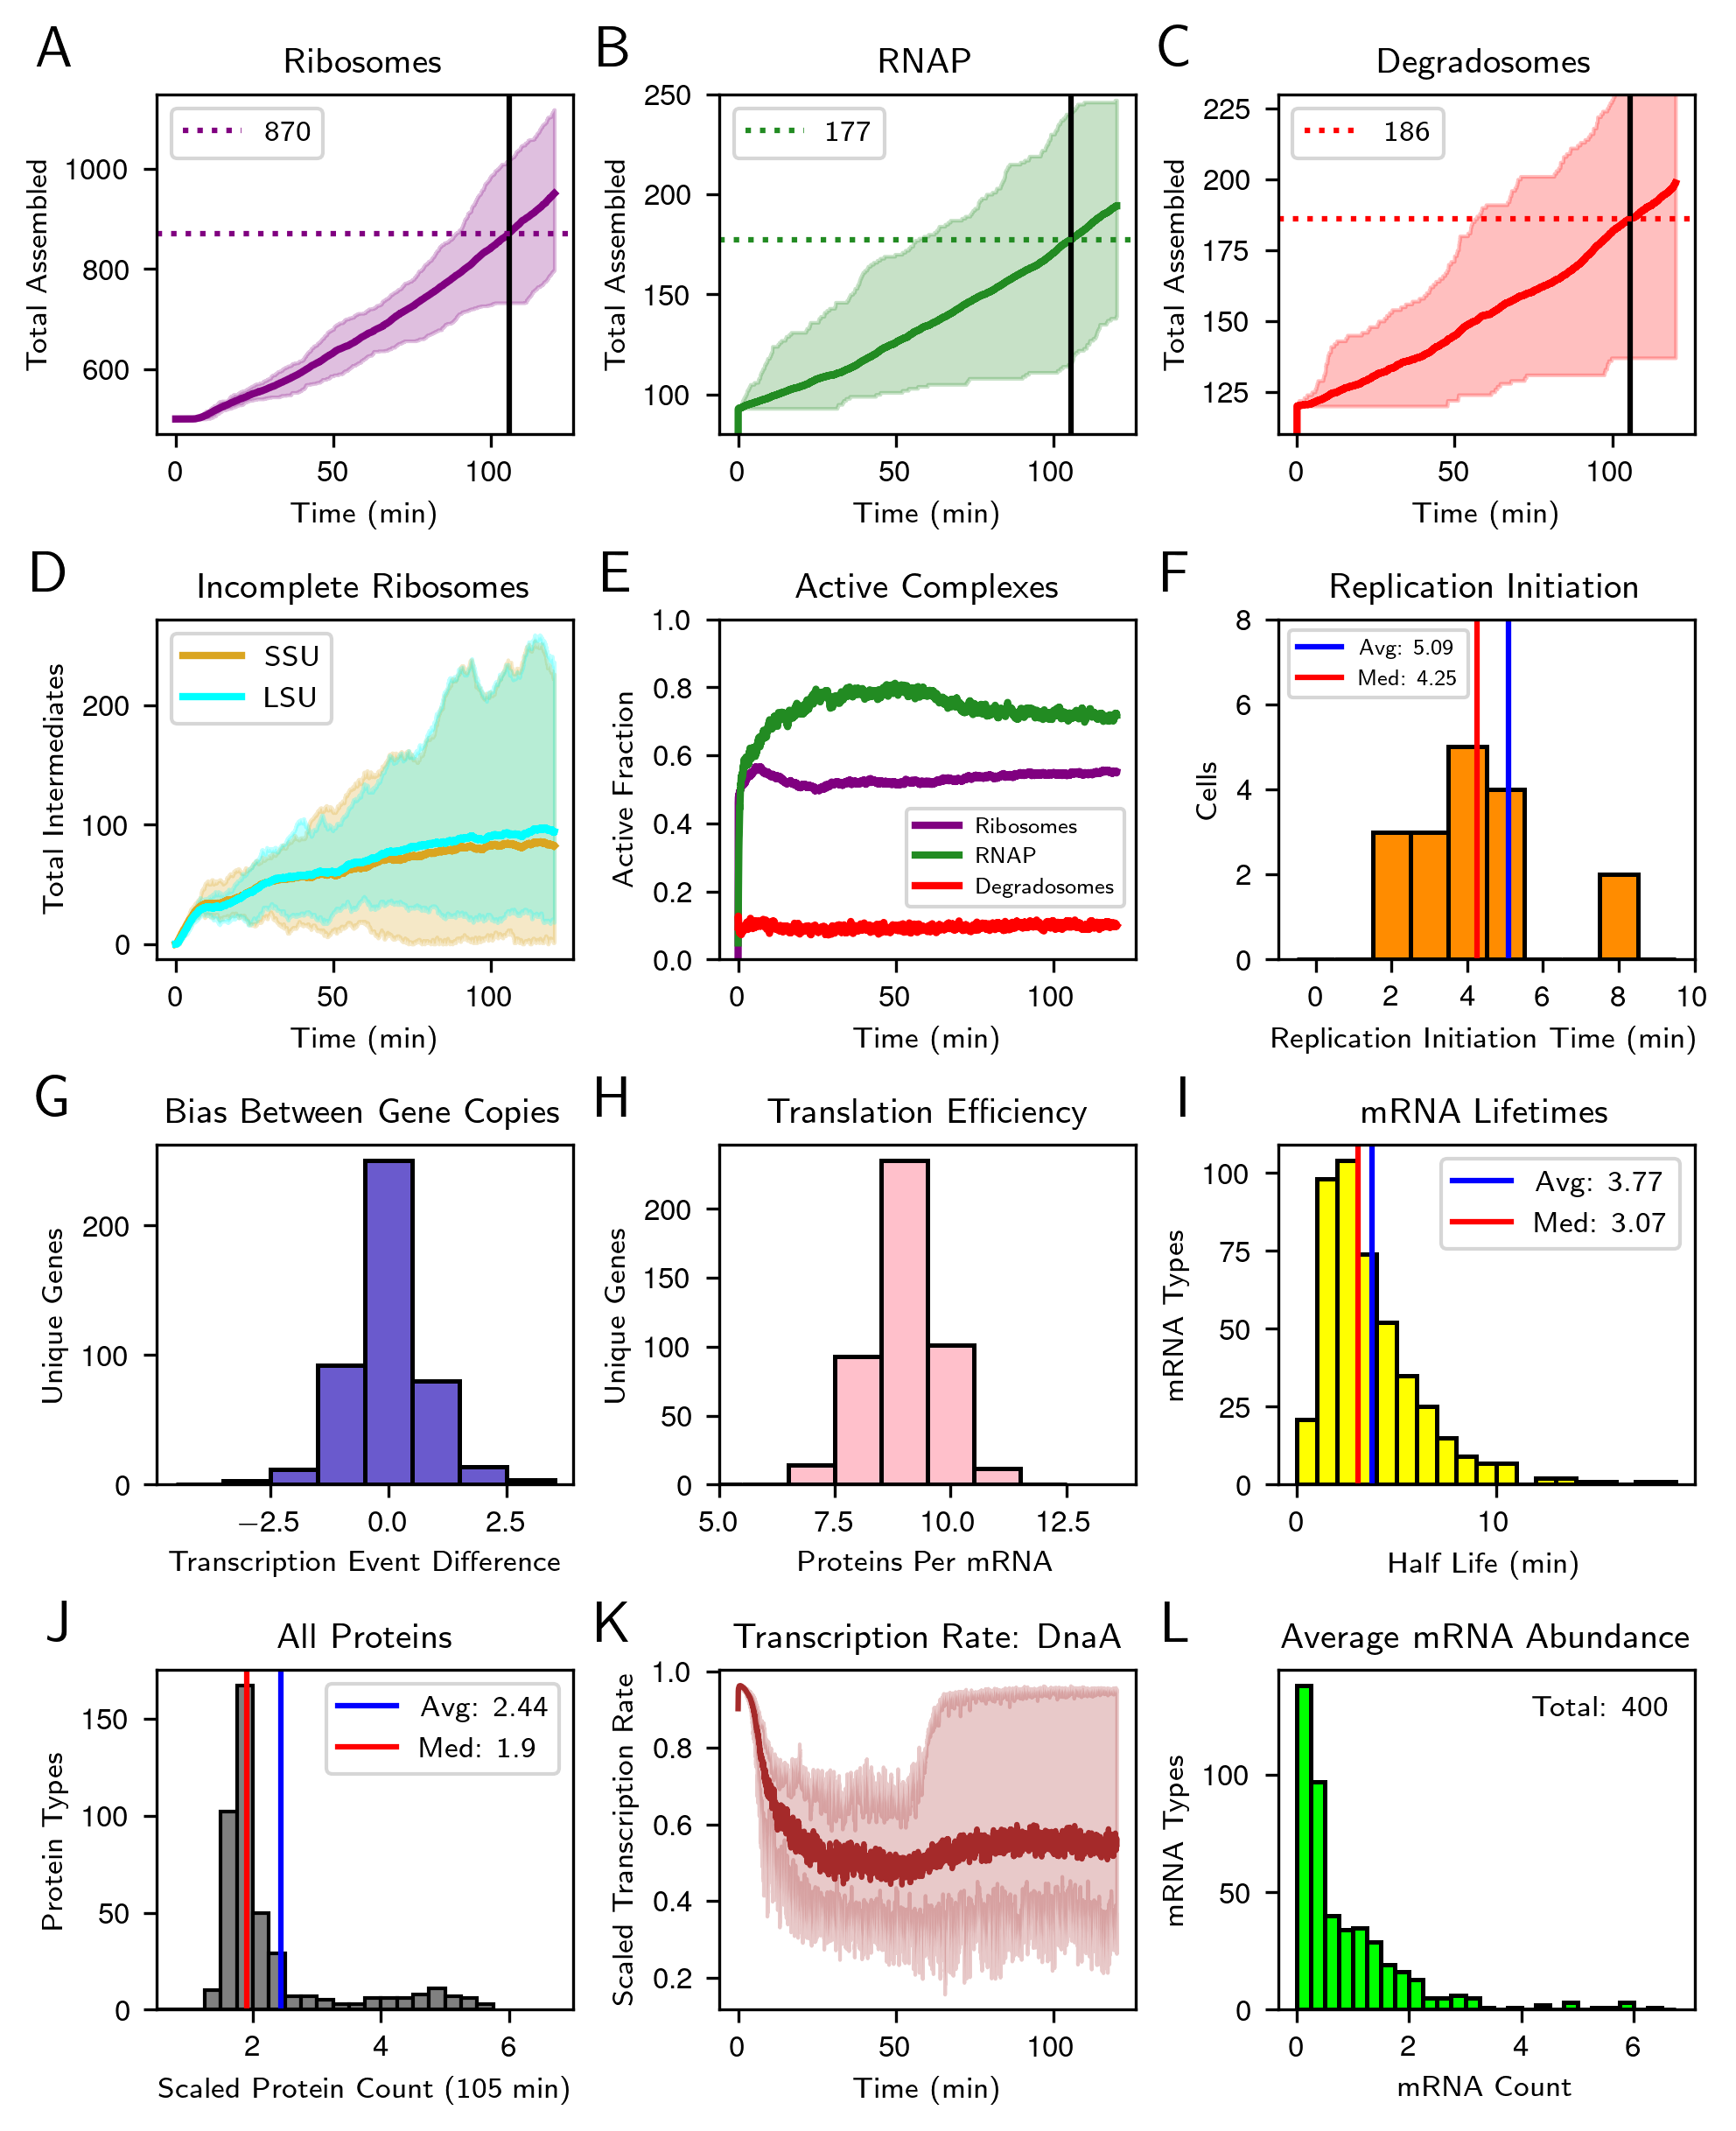

In [77]:
fig, axs = plt.subplots(4,3, figsize=(6.5,8), constrained_layout=True)
plt.rcParams.update({'font.size': 8})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

riboColor = 'purple'
rnapColor = 'forestgreen'
degColor = 'red'

repInitColor = 'darkorange'

trscBiasColor = 'slateblue'
ppmColor = 'pink'
halfColor='yellow'

ptnDistColor = 'grey'
riboPtnDistColor = 'goldenrod'
ssuColor = 'goldenrod'
lsuColor = 'cyan'
mrnaColor = 'lime'

trscColor = 'brown'

# Average ribosomes
axs[0,0].plot(t/60, np.average(ribosome_totals, axis=0),color=riboColor,lw=2)
axs[0,0].fill_between(t/60, np.percentile(ribosome_totals, 0, axis=0), 
                np.percentile(ribosome_totals,100,axis=0), color=riboColor, alpha=0.25)

axs[0,0].axvline(sa_dt,color='k')
axs[0,0].axhline(np.average(ribosome_totals, axis=0)[int(sa_dt*60)], color=riboColor, linestyle=':', label=f'{int(np.average(ribosome_totals, axis=0)[int(sa_dt*60)])}')

axs[0,0].set_xlabel('Time (min)')
axs[0,0].set_ylabel('Total Assembled')
axs[0,0].set_title('Ribosomes')
axs[0,0].legend()

# Average RNAP
axs[0,1].plot(t/60, np.average(rnap_totals, axis=0),color=rnapColor,lw=2)
axs[0,1].fill_between(t/60, np.percentile(rnap_totals, 0, axis=0), 
                np.percentile(rnap_totals,100,axis=0), color=rnapColor, alpha=0.25)
axs[0,1].set_ylim(80,250)

axs[0,1].axvline(sa_dt,color='k')
axs[0,1].axhline(np.average(rnap_totals, axis=0)[int(sa_dt*60)], color=rnapColor, linestyle=':', label=f'{int(np.average(rnap_totals, axis=0)[int(sa_dt*60)])}')

axs[0,1].set_xlabel('Time (min)')
axs[0,1].set_ylabel('Total Assembled')
axs[0,1].set_title('RNAP')
axs[0,1].legend()

# Average Degradosomes
axs[0,2].plot(t/60, np.average(degradosome_totals, axis=0),color=degColor,lw=2)
axs[0,2].fill_between(t/60, np.percentile(degradosome_totals, 0, axis=0), 
                np.percentile(degradosome_totals,100,axis=0), color=degColor, alpha=0.25)
axs[0,2].set_ylim(110,230)

axs[0,2].axvline(sa_dt,color='k')
axs[0,2].axhline(np.average(degradosome_totals, axis=0)[int(sa_dt*60)], color=degColor, linestyle=':', label=f'{int(np.average(degradosome_totals, axis=0)[int(sa_dt*60)])}')


axs[0,2].set_xlabel('Time (min)')
axs[0,2].set_ylabel('Total Assembled')
axs[0,2].set_title('Degradosomes')

axs[0,2].legend()

# Ribosomal Protein Production
axs[1,0].plot(t/60, np.average(ssu_states, axis=0),color=ssuColor,lw=2,label='SSU')
axs[1,0].fill_between(t/60, np.percentile(ssu_states, 0, axis=0), 
                np.percentile(ssu_states,100,axis=0), color=ssuColor, alpha=0.25)
axs[1,0].plot(t/60, np.average(lsu_states, axis=0),color=lsuColor,lw=2,label='LSU')
axs[1,0].fill_between(t/60, np.percentile(lsu_states, 0, axis=0), 
                np.percentile(lsu_states,100,axis=0), color=lsuColor, alpha=0.25)
axs[1,0].set_xlabel('Time (min)')
axs[1,0].set_ylabel('Total Intermediates')
axs[1,0].set_title('Incomplete Ribosomes')
axs[1,0].legend(loc='upper left')

# Average active ribosomes
axs[1,1].plot(t/60, ribo_act_dat, color=riboColor,lw=2,label='Ribosomes')
# axs[1,0].set_ylim(0.45,0.65)
# axs[1,0].set_xlabel('Time (min)')
# axs[1,0].set_ylabel('Active Fraction')
# axs[1,0].set_title('Ribosomes')

# Average active RNAP
axs[1,1].plot(t/60, rnap_act_dat, color=rnapColor,lw=2,label='RNAP')
# axs[1,1].set_ylim(0.45,0.85)
axs[1,1].set_xlabel('Time (min)')
axs[1,1].set_ylabel('Active Fraction')
# axs[1,1].set_title('RNAP')

# Average active Degradosomes
axs[1,1].plot(t/60, deg_act_dat, color=degColor,lw=2,label='Degradosomes')
# axs[1,2].set_xlabel('Time (min)')
# axs[1,2].set_ylabel('Active Fraction')
# axs[1,2].set_title('Degradosomes')
axs[1,1].set_title('Active Complexes')
axs[1,1].set_ylim(0,1)
axs[1,1].legend(loc='center right',bbox_to_anchor=(1.0,0.3),prop={'size':6})

# Replication Initiation Times
bins = [x-0.5 for x in range(11)]
axs[1,2].hist(np.array(repInitTimes)/60, color=repInitColor, edgecolor='k', linewidth=1.2, bins=bins)
axs[1,2].set_xticks([x*2 for x in range(6)])
axs[1,2].set_ylim(0,8)

avg_init = np.average(np.array(repInitTimes))/60
med_init = np.median(np.array(repInitTimes))/60

axs[1,2].axvline(avg_init, color='blue', label=f"Avg: {round_sig(avg_init,3)}")
axs[1,2].axvline(med_init, color='red', label=f"Med: {round_sig(med_init,3)}")

axs[1,2].set_xlabel('Replication Initiation Time (min)')
axs[1,2].set_ylabel('Cells')
axs[1,2].set_title('Replication Initiation')
axs[1,2].legend(prop={'size':6})

# Transcription Bias
bins = [x-0.5 for x in range(int(min(gene_trsc_diffs))-1,int(max(gene_trsc_diffs))+3)]
axs[2,0].hist(gene_trsc_diffs, color=trscBiasColor, edgecolor='k', linewidth=1.2, bins=bins)
axs[2,0].set_xlabel('Transcription Event Difference')
axs[2,0].set_ylabel('Unique Genes')
axs[2,0].set_title('Bias Between Gene Copies')

# Translations per mRNA
bins = [x-0.5 for x in range(int(min(protPerMrna))-1,int(max(protPerMrna))+3)]
axs[2,1].hist(protPerMrna,color=ppmColor, edgecolor='k', linewidth=1.2, bins=bins)
axs[2,1].set_xlabel('Proteins Per mRNA')
axs[2,1].set_ylabel('Unique Genes')
axs[2,1].set_title('Translation Efficiency')
axs[2,1].set_xlim(int(min(protPerMrna))-1,int(max(protPerMrna))+3)
# axs[2,1].set_xticks([x for x in range(int(min(protPerMrna))-1,int(max(protPerMrna))+3)])

# mRNA Half-Lives
bins = [x for x in range(20)]
axs[2,2].hist(half_lives, color=halfColor, edgecolor='k', linewidth=1.2, bins=bins)

avg_half = np.average(np.array(half_lives))
med_half = np.median(np.array(half_lives))

axs[2,2].axvline(avg_half, color='blue', label=f"Avg: {round_sig(avg_half,3)}")
axs[2,2].axvline(med_half, color='red', label=f"Med: {round_sig(med_half,3)}")

axs[2,2].set_xlabel('Half Life (min)')
axs[2,2].set_ylabel('mRNA Types')
axs[2,2].set_title('mRNA Lifetimes')
axs[2,2].legend(loc='upper right')


# Protein Production
bins = [x*0.25 for x in range(0,int(6/0.25))]
        
axs[3,0].hist(all_ptns_dist, color=ptnDistColor, edgecolor='k', bins=bins, linewidth=1)

avg_ptns = np.average(np.array(all_ptns_dist))
median_ptns = np.median(np.array(all_ptns_dist))

axs[3,0].axvline(avg_ptns, color='blue', label=f"Avg: {round_sig(avg_ptns,3)}")
axs[3,0].axvline(median_ptns, color='red', label=f"Med: {round_sig(median_ptns,3)}")

axs[3,0].set_xlim(0.5,7)
axs[3,0].set_xlabel('Scaled Protein Count (105 min)')
axs[3,0].set_ylabel('Protein Types')
axs[3,0].set_title('All Proteins')
axs[3,0].legend(loc='upper right')

# Transcription Rates
axs[3,1].plot(t/60, np.average(trsc_rates,axis=0), color=trscColor)
axs[3,1].fill_between(t/60, np.percentile(trsc_rates, 1, axis=0), 
                 np.percentile(trsc_rates, 99, axis=0), color=trscColor, alpha=0.25)

axs[3,1].set_xlabel('Time (min)')
axs[3,1].set_ylabel('Scaled Transcription Rate')
axs[3,1].set_title('Transcription Rate: DnaA')

# mRNA Counts
bins = [x*0.25 for x in range(28)]
axs[3,2].hist(mrna_counts, color=mrnaColor, edgecolor='k', linewidth=1.2, bins=bins)
axs[3,2].set_xlabel('mRNA Count')
axs[3,2].set_ylabel('mRNA Types')
axs[3,2].set_title('Average mRNA Abundance')
axs[3,2].plot(np.NaN, np.NaN, '-', color='none', label=f'Total: {int(np.sum(mrna_counts))}')

axs[3,2].legend(frameon=False)

subfigs = ['A','B','C','D','E','F','G','H','I','J','K','L']
for i, ax in enumerate(fig.axes):
    ax.text(-0.2, 1.2, subfigs[i], transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

# plt.tight_layout()

plt.savefig(f'{figDir}GIP_statistics.png')

In [30]:
# plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({"font.family": 'sans-serif'})

# # plt.figure(figsize=(3.3,2))
# fig = plt.figure(figsize=(6,4))

# ax = plt.gca()

# ribo_avg = np.zeros(len(t))

for specID in specList:
    
    if specID.startswith('RPM_'):
        
        if ('0067' in specID) or ('0068' in specID) or ('0069' in specID) or ('0532' in specID) or ('0533' in specID) or ('0534' in specID): 
        
            riboSpec = [specID]

            stateTrace = w.get_avg_species_traces(riboSpec)
        
            print(specID, stateTrace[0][-1])

RPM_0067 350.0
RPM_0068 289.55
RPM_0069 280.0
RPM_0532 319.55
RPM_0533 254.95
RPM_0534 252.9


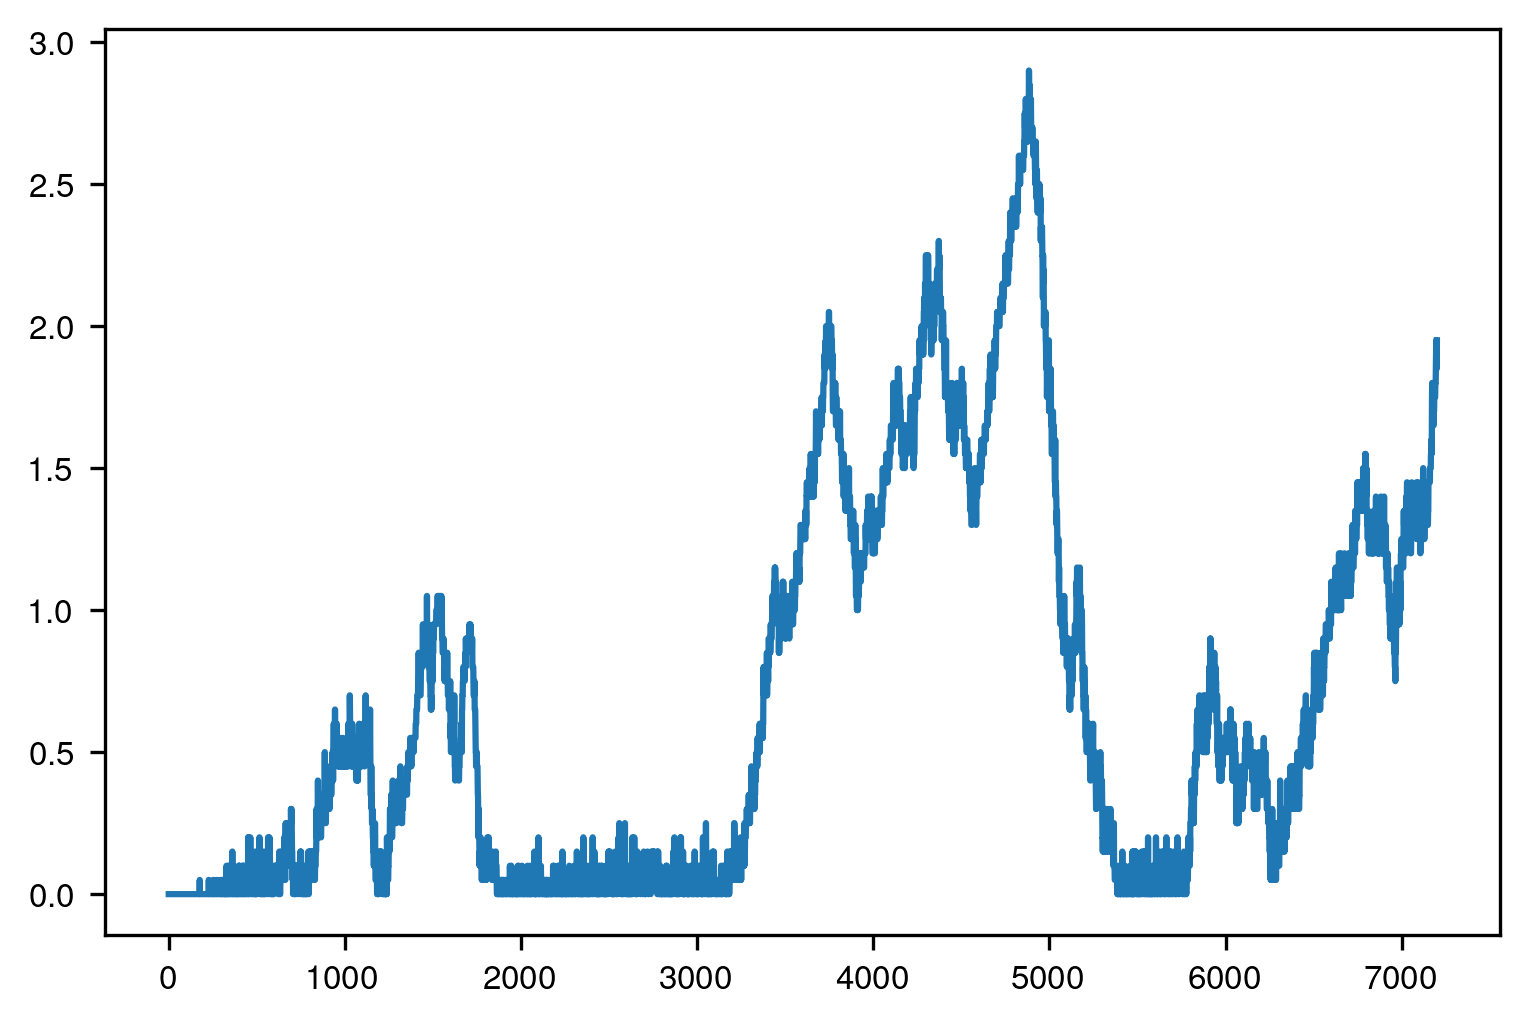

In [31]:
specCheck = ['R5SL1L2L3L4L5L6L11L13L14L15L17L18L19L20L21L22L23L24L28L29L32L34']

stateTrace = w.get_avg_species_traces(specCheck)

plt.plot(t, stateTrace[0])

In [32]:
for specID in specList:
    
    if specID.startswith('F_'):
    
#     if 'ost' in specID:
        
        print(specID)

F_PGI
F_PFK
F_FBA
F_TPI
F_GAPD
F_GAPDP
F_PGK
F_PGM
F_ENO
F_PYK
F_LDH_L
F_PDH_acald
F_PDH_E3
F_PTAr
F_ACKr
F_NOX
F_TALA
F_TKT1
F_TKT2
F_RPE
F_RPI
F_PRPPS
F_PPM
F_PPM2
F_DRPA
F_ADPT
F_PUNP1
F_ADK1
F_RNDR1
F_TRDR
F_PPA
F_PUNP2
F_DADNK
F_DADK
F_PYK5
F_PGK2
F_GUAPRT
F_PUNP3
F_GK1
F_RNDR2
F_PYK3
F_PGK3
F_PUNP4
F_DGSNK
F_DGK1
F_PYK6
F_PGK4
F_UPPRT
F_UMPK
F_PYK2
F_RNDR4
F_CYTK1
F_PYK4
F_RNDR3
F_DCYTK
F_CYTK2
F_PYK7
F_DURIK1
F_TMDK1
F_TMPK
F_PYK8
F_PYK9
F_CTPS2
F_CTPSDUMP
F_DCMPDA
F_DUTPDP
F_NTD5
F_NTD1
F_NTD8
F_NTD6
F_PUNP5
F_GLYK
F_ACPS
F_BPNT
F_FAKr
F_ACPPAT
F_APG3PAT
F_AGPAT
F_DASYN
F_PGSA
F_PGPP
F_CLPNS
F_PAPA
F_PGMT
F_GALU
F_UDPG4E
F_UDPGALM
F_DAGGALT
F_NCTPPRT
F_NNATr
F_NADS
F_NADK
F_NADHK
F_RBFK
F_FMNAT
F_5FTHFPGS
F_MTHFC
F_FMETTRS
F_GHMT
F_MTHFD
F_FTHFCL
F_GHMT2
F_ATPase
F_RIBFLVabc
F_P5Pabc
F_5FTHFabc
F_NACabc
F_COAabc
F_THMPPabc
F_SPRMabc
F_DCYTabc
F_URIabc
F_THMDabc
F_ADNabc
F_DADNabc
F_GSNabc
F_DGSNabc
F_Kt6
F_MG2abc
F_CA2abc
F_PIabc
F_ARGabc
F_ASPabc
F_GLUabc
F_GLYabc
F_ILEabc
F_A

In [33]:
['ATP_trsc_cost_second', 'ATP_mRNAdeg_cost_second', 'ATP_DNArep_cost_second', 'ATP_transloc_cost_second',
 'ATP_mRNA_cost_second', 'ATP_tRNA_cost_second', 'ATP_rRNA_cost_second']
['F_RIBFLVabc','F_P5Pabc','F_5FTHFabc','F_NACabc','F_COAabc','F_THMPPabc','F_SPRMabc',
'F_DCYTabc','F_URIabc','F_THMDabc','F_ADNabc','F_DADNabc','F_GSNabc','F_DGSNabc',
'F_Kt6','F_MG2abc','F_CA2abc','F_PIabc',
'F_ARGabc','F_ASPabc','F_GLUabc','F_GLYabc','F_ILEabc','F_ALAabc','F_ASNabc','F_LEUabc','F_GLNabc','F_HISabc',
'F_LYSabc','F_PROabc','F_PHEabc','F_THRabc','F_TRPabc','F_TYRabc','F_VALabc','F_SERabc','F_METabc']
['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY',
 'HIS','ILE','LEU','LYS','MET','PHE',
 'PRO','SER','THR','TRP','TYR','VAL','FMET']
['PFK','PRPPS','ADK1','DADK','GK1','DGK1','UMPK','CYTK1','CYTK2','TMDK1','TMPK',
 'NNATr','NADS','NADK','RBFK','FMNAT','5FTHFPGS','FTHFCL','FAKr','GLYK']

['PFK',
 'PRPPS',
 'ADK1',
 'DADK',
 'GK1',
 'DGK1',
 'UMPK',
 'CYTK1',
 'CYTK2',
 'TMDK1',
 'TMPK',
 'NNATr',
 'NADS',
 'NADK',
 'RBFK',
 'FMNAT',
 '5FTHFPGS',
 'FTHFCL',
 'FAKr',
 'GLYK']

In [34]:
def getAvgRxnTraceCounts(rxnID):
    allFluxes = w.get_rxn_trace(rxnID)
    allFluxes = allFluxes.T
#     print(allFluxes.shape)

    vol = ['Volume']
    
    vols = w.get_species_traces(vol)
    vols = vols[0].T/1000000*1e-15
#     print(vols.shape)
    
    allCountFluxes = np.multiply(allFluxes,vols)*6.02e23/1000
    
#     print(allCountFluxes.shape)
    
    return allCountFluxes

In [79]:
fluxTestArr = getAvgRxnTraceCounts('FBA')

for flux in fluxTestArr:
    print(flux[-1])

40353.866
26996.737547017816
22477.10261155331
17755.70094378889
20015.517208882215
23566.65739763999
38901.12628521776
28489.82820298219
26996.737547017816
20419.055484037755
34421.84710149109
38457.23466360224
20096.225104441106
25422.93538757777
23970.195672795537
24333.380601491095
30668.937775155544
33977.95547987556
27158.150932857756
25584.351178695564


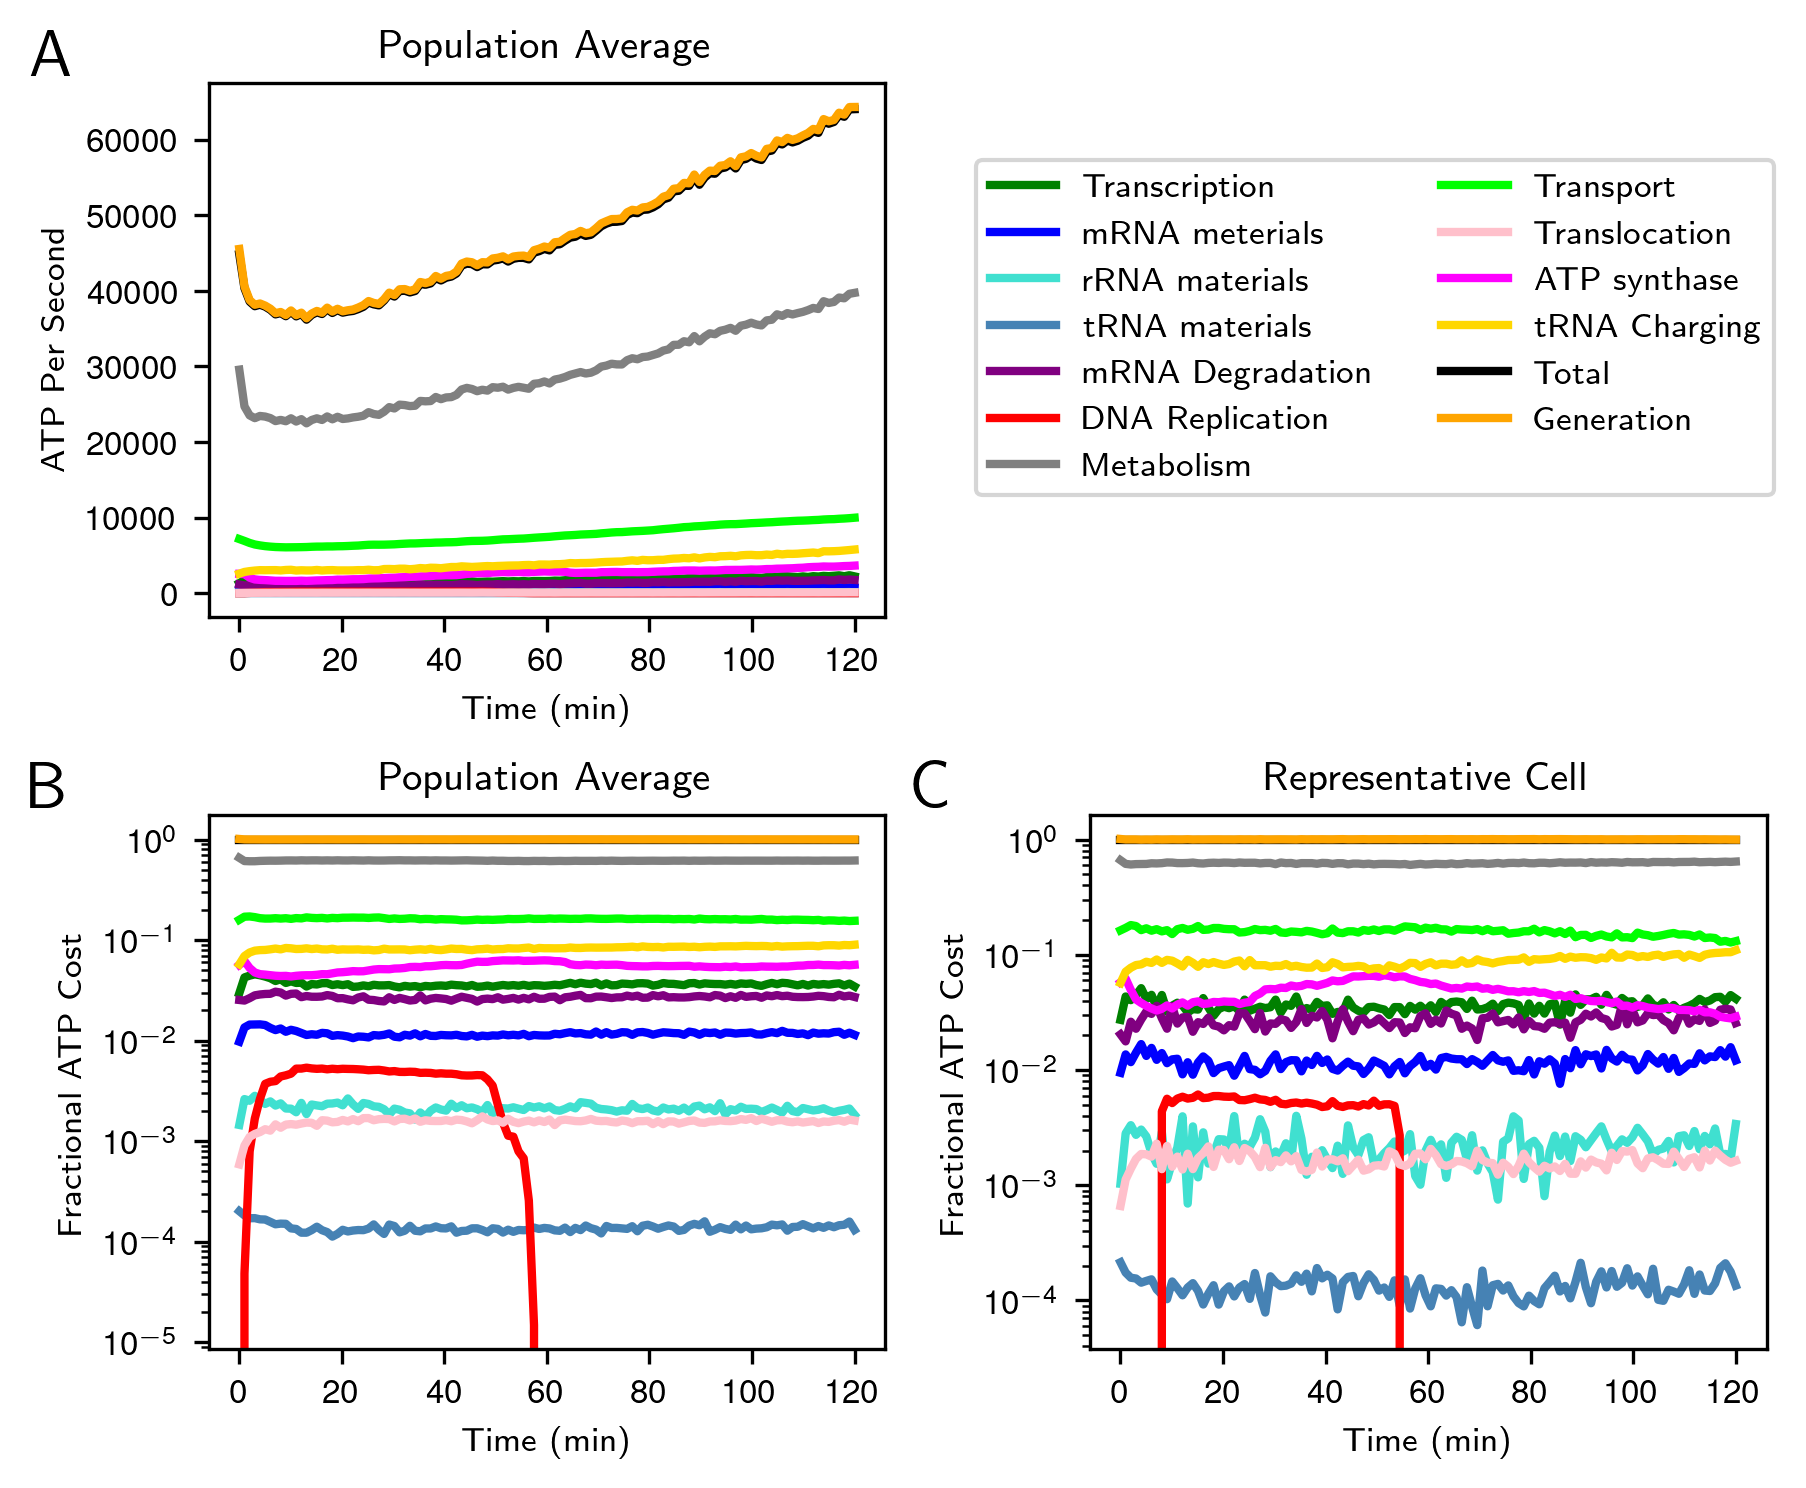

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(6,5))
plt.rcParams.update({'font.size': 8})
# plt.rcParams.update({"font.family": 'sans-serif'})

plt.rcParams['figure.dpi'] = 300

# plt.figure(figsize=(3.3,2))
# fig = plt.figure(figsize=(6,4))

tmin = np.linspace(0,120,120)
endpoint = 7200

atpTrscID = ['ATP_trsc_cost_second']
atpTrsc = w.get_species_traces(atpTrscID)
atpTrsc = atpTrsc[0].T

atpMrnadegID = ['ATP_mRNAdeg_cost_second']
atpMrnadeg =  w.get_species_traces(atpMrnadegID)
atpMrnadeg = atpMrnadeg[0].T

atpDnarepID = ['ATP_DNArep_cost_second']
atpDnarep = w.get_species_traces(atpDnarepID)
atpDnarep = atpDnarep[0].T

atpMrnaID = ['ATP_mRNA_cost_second']
atpMrna = w.get_species_traces(atpMrnaID)
atpMrna = atpMrna[0].T

atpRrnaID = ['ATP_rRNA_cost_second']
atpRrna = w.get_species_traces(atpRrnaID)
atpRrna = atpRrna[0].T

atpTrnaID = ['ATP_tRNA_cost_second']
atpTrna = w.get_species_traces(atpTrnaID)
atpTrna = atpTrna[0].T

atnRna = atpMrna + atpRrna + atpTrna

atpTranslocID = ['ATP_transloc_cost_second']
atpTransloc = w.get_species_traces(atpTranslocID)
atpTransloc = atpTransloc[0].T


aaID = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY',
 'HIS','ILE','LEU','LYS','MET','PHE',
 'PRO','SER','THR','TRP','TYR','VAL','FMET']
atpChargingID = [x+'_cost_second' for x in aaID]
atpCharging = None
for ID in atpChargingID:
    aaCost = w.get_species_traces([ID])
    if atpCharging is None:
        atpCharging = aaCost[0].T
    else:
        atpCharging = atpCharging + aaCost[0].T
        

transportRxnIDs = ['F_RIBFLVabc','F_P5Pabc','F_5FTHFabc','F_NACabc','F_COAabc','F_THMPPabc','F_SPRMabc',
'F_DCYTabc','F_URIabc','F_THMDabc','F_ADNabc','F_DADNabc','F_GSNabc','F_DGSNabc',
'F_Kt6','F_MG2abc','F_CA2abc','F_PIabc',
'F_ARGabc','F_ASPabc','F_GLUabc','F_GLYabc','F_ILEabc','F_ALAabc','F_ASNabc','F_LEUabc','F_GLNabc','F_HISabc',
'F_LYSabc','F_PROabc','F_PHEabc','F_THRabc','F_TRPabc','F_TYRabc','F_VALabc','F_SERabc','F_METabc']
transportRxnIDs = [x.split('_')[1] for x in transportRxnIDs]
atpTransport = None
for rxnID in transportRxnIDs:
    rxnRateCounts = getAvgRxnTraceCounts(rxnID)
    if atpTransport is None:
        atpTransport = rxnRateCounts
    else:
        atpTransport = atpTransport+rxnRateCounts
        
        
metRxnID = ['PFK','PRPPS','ADK1','DADK','GK1','DGK1','UMPK','CYTK1','CYTK2','TMDK1','TMPK',
 'NNATr','NADS','NADK','RBFK','FMNAT','5FTHFPGS','FTHFCL','FAKr','GLYK']
atpMetabolism = None
for rxnID in metRxnID:
    rxnRateCounts = getAvgRxnTraceCounts(rxnID)
    if atpMetabolism is None:
        atpMetabolism = rxnRateCounts
    else:
        atpMetabolism = atpMetabolism+rxnRateCounts
        
atpAtpaseID = 'ATPase'
atpAtpase = getAvgRxnTraceCounts(atpAtpaseID)
atpAtpase = -1*atpAtpase

atpTotal = atpMetabolism + atpAtpase + atpCharging + atpDnarep + atpMrna + atpMrnadeg + atpRrna + atpTransloc + atpTransport + atpTrna + atpTrsc


generationIDs = ['PYK','PGK','ACKr']
atpGeneration = None
for rxnID in generationIDs:
    rxnRateCounts = getAvgRxnTraceCounts(rxnID)
    if atpGeneration is None:
        atpGeneration = rxnRateCounts
    else:
        atpGeneration = atpGeneration+rxnRateCounts
        
trsccolor = 'green'
mrnacolor = 'blue'
rrnacolor = 'turquoise'
trnacolor = 'steelblue'
degcolor = 'purple'
repcolor = 'red'
metcolor = 'grey'
transportcolor = 'lime'
transloccolor = 'pink'
atpsynthcolor = 'fuchsia'
chargingcolor = 'gold'
totalcolor = 'k'
generatedcolor = 'orange'
        
axs[0,0].plot(tmin, np.average(atpTrsc[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=trsccolor,lw=2, label='Transcription')
axs[0,0].plot(tmin, np.average(atpMrna[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=mrnacolor,lw=2, label='mRNA meterials')
axs[0,0].plot(tmin, np.average(atpRrna[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=rrnacolor,lw=2, label='rRNA materials')
axs[0,0].plot(tmin, np.average(atpTrna[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=trnacolor,lw=2, label='tRNA materials')
axs[0,0].plot(tmin, np.average(atpMrnadeg[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=degcolor,lw=2, label='mRNA Degradation')
axs[0,0].plot(tmin, np.average(atpDnarep[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=repcolor,lw=2, label='DNA Replication')
axs[0,0].plot(tmin, np.average(atpMetabolism[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=metcolor,lw=2, label='Metabolism')
axs[0,0].plot(tmin, np.average(atpTransport[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=transportcolor,lw=2, label='Transport')
axs[0,0].plot(tmin, np.average(atpTransloc[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=transloccolor,lw=2, label='Translocation')
axs[0,0].plot(tmin, np.average(atpAtpase[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=atpsynthcolor,lw=2, label='ATP synthase')
axs[0,0].plot(tmin, np.average(atpCharging[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=chargingcolor,lw=2, label='tRNA Charging')
axs[0,0].plot(tmin, np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=totalcolor,lw=2, label='Total')
axs[0,0].plot(tmin, np.average(atpGeneration[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=generatedcolor,lw=2, label='Generation')
# ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0)/np.average(tot_sa, axis=0)[0], 
#                 np.percentile(tot_sa,99,axis=0)/np.average(tot_sa, axis=0)[0], color='purple', alpha=0.25)
axs[0,0].set_ylabel('ATP Per Second')
axs[0,0].set_xlabel('Time (min)')
axs[0,0].set_xticks([x*20 for x in range(7)])
axs[0,0].title.set_text('Population Average')
axs[0,0].text(-0.2, 1.1, 'A', transform=axs[0,0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


axs[1,0].plot(tmin, np.average(atpTrsc[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=trsccolor,lw=2)
axs[1,0].plot(tmin, np.average(atpMrna[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=mrnacolor,lw=2)
axs[1,0].plot(tmin, np.average(atpRrna[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=rrnacolor,lw=2)
axs[1,0].plot(tmin, np.average(atpTrna[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=trnacolor,lw=2)
axs[1,0].plot(tmin, np.average(atpMrnadeg[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=degcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpDnarep[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=repcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpMetabolism[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=metcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpTransport[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=transportcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpTransloc[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=transloccolor,lw=2)
axs[1,0].plot(tmin, np.average(atpAtpase[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=atpsynthcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpCharging[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=chargingcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=totalcolor,lw=2)
axs[1,0].plot(tmin, np.average(atpGeneration[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1)/np.average(atpTotal[:,:endpoint], axis=0).reshape(-1, 60).mean(axis=1), 
        color=generatedcolor,lw=2)
# ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0)/np.average(tot_sa, axis=0)[0], 
#                 np.percentile(tot_sa,99,axis=0)/np.average(tot_sa, axis=0)[0], color='purple', alpha=0.25)
axs[1,0].set_ylabel('Fractional ATP Cost')
axs[1,0].set_xlabel('Time (min)')
axs[1,0].title.set_text('Population Average')
axs[1,0].set_xticks([x*20 for x in range(7)])
axs[1,0].set_yscale('log')
axs[1,0].text(-0.2, 1.1, 'B', transform=axs[1,0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


# axs[2,0].plot(t[:endpoint]/60, np.average(atpTrsc[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=trsccolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpMrna[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=mrnacolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpRrna[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=rrnacolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpTrna[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=trnacolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpMrnadeg[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=degcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpDnarep[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=repcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpMetabolism[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=metcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpTransport[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=transportcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpTransloc[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=transloccolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpAtpase[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=atpsynthcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpCharging[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=chargingcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpTotal[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=totalcolor,lw=0.5)
# axs[2,0].plot(t[:endpoint]/60, np.average(atpGeneration[:,:endpoint], axis=0)/np.average(atpTotal[:,:endpoint], axis=0), 
#         color=generatedcolor,lw=0.5)
# # ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0)/np.average(tot_sa, axis=0)[0], 
# #                 np.percentile(tot_sa,99,axis=0)/np.average(tot_sa, axis=0)[0], color='purple', alpha=0.25)
# axs[2,0].set_ylabel('Fractional ATP Cost')
# axs[2,0].set_xlabel('Time (min)')
# # axs[1,0].title.set_text('Average Over 4 Cells')
# axs[2,0].set_yscale('log')


repID = 5
axs[1,1].plot(tmin, atpTrsc[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=trsccolor,lw=2)
axs[1,1].plot(tmin, atpMrna[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=mrnacolor,lw=2)
axs[1,1].plot(tmin, atpRrna[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=rrnacolor,lw=2)
axs[1,1].plot(tmin, atpTrna[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=trnacolor,lw=2)
axs[1,1].plot(tmin, atpMrnadeg[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=degcolor,lw=2)
axs[1,1].plot(tmin, atpDnarep[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=repcolor,lw=2)
axs[1,1].plot(tmin, atpMetabolism[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=metcolor,lw=2)
axs[1,1].plot(tmin, atpTransport[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=transportcolor,lw=2)
axs[1,1].plot(tmin, atpTransloc[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=transloccolor,lw=2)
axs[1,1].plot(tmin, atpAtpase[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=atpsynthcolor,lw=2)
axs[1,1].plot(tmin, atpCharging[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=chargingcolor,lw=2)
axs[1,1].plot(tmin, atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=totalcolor,lw=2)
axs[1,1].plot(tmin, atpGeneration[repID,:endpoint].reshape(-1, 60).mean(axis=1)/atpTotal[repID,:endpoint].reshape(-1, 60).mean(axis=1), 
        color=generatedcolor,lw=2)
# ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0)/np.average(tot_sa, axis=0)[0], 
#                 np.percentile(tot_sa,99,axis=0)/np.average(tot_sa, axis=0)[0], color='purple', alpha=0.25)
axs[1,1].set_ylabel('Fractional ATP Cost')
axs[1,1].set_xlabel('Time (min)')
axs[1,1].title.set_text('Representative Cell')
axs[1,1].set_xticks([x*20 for x in range(7)])
axs[1,1].set_yscale('log')
axs[1,1].text(-0.2, 1.1, 'C', transform=axs[1,1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


# axs[2,1].plot(t[:endpoint]/60, atpTrsc[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=trsccolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpMrnadeg[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=degcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpMetabolism[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=metcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpTransport[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=transportcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpAtpase[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=atpsynthcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpCharging[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=chargingcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpTotal[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=totalcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpGeneration[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=generatedcolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpMrna[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=mrnacolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpRrna[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=rrnacolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpTransloc[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=transloccolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpTrna[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=trnacolor,lw=0.5)
# axs[2,1].plot(t[:endpoint]/60, atpDnarep[repID,:endpoint]/atpTotal[repID,:endpoint], 
#         color=repcolor,lw=0.5)
# # ax.fill_between(t/60, np.percentile(tot_sa,1,axis=0)/np.average(tot_sa, axis=0)[0], 
# #                 np.percentile(tot_sa,99,axis=0)/np.average(tot_sa, axis=0)[0], color='purple', alpha=0.25)
# axs[2,1].set_ylabel('Fractional ATP Cost')
# axs[2,1].set_xlabel('Time (min)')
# # axs[2,1].title.set_text('Representative Cell')
# axs[2,1].set_yscale('log')


leg = fig.legend(ncol=2)

bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted()) 

bb.x0 = bb.x0
bb.x1 = bb.x1 - 0.02
bb.y1 = bb.y1 - 0.4
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

fig.delaxes(axs[0,1])

plt.tight_layout()

plt.savefig(f'{figDir}atp_costs.png')

{2: {'time': 211, 'DnaA': 20}, 4: {'time': 295, 'DnaA': 20}, 5: {'time': 487, 'DnaA': 20}, 8: {'time': 217, 'DnaA': 20}, 10: {'time': 664, 'DnaA': 20}, 11: {'time': 634, 'DnaA': 20}, 12: {'time': 308, 'DnaA': 20}, 14: {'time': 249, 'DnaA': 20}, 15: {'time': 288, 'DnaA': 20}, 16: {'time': 166, 'DnaA': 20}, 0: {'time': 478, 'DnaA': 21}, 9: {'time': 197, 'DnaA': 21}, 13: {'time': 619, 'DnaA': 21}, 17: {'time': 214, 'DnaA': 21}, 3: {'time': 115, 'DnaA': 22}, 6: {'time': 261, 'DnaA': 22}, 7: {'time': 310, 'DnaA': 22}, 18: {'time': 108, 'DnaA': 22}, 19: {'time': 178, 'DnaA': 22}, 1: {'time': 104, 'DnaA': 23}}
[211, 295, 487, 217, 664, 634, 308, 249, 288, 166, 478, 197, 619, 214, 115, 261, 310, 108, 178, 104]
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23]


Text(0, 0.5, 'Cells')

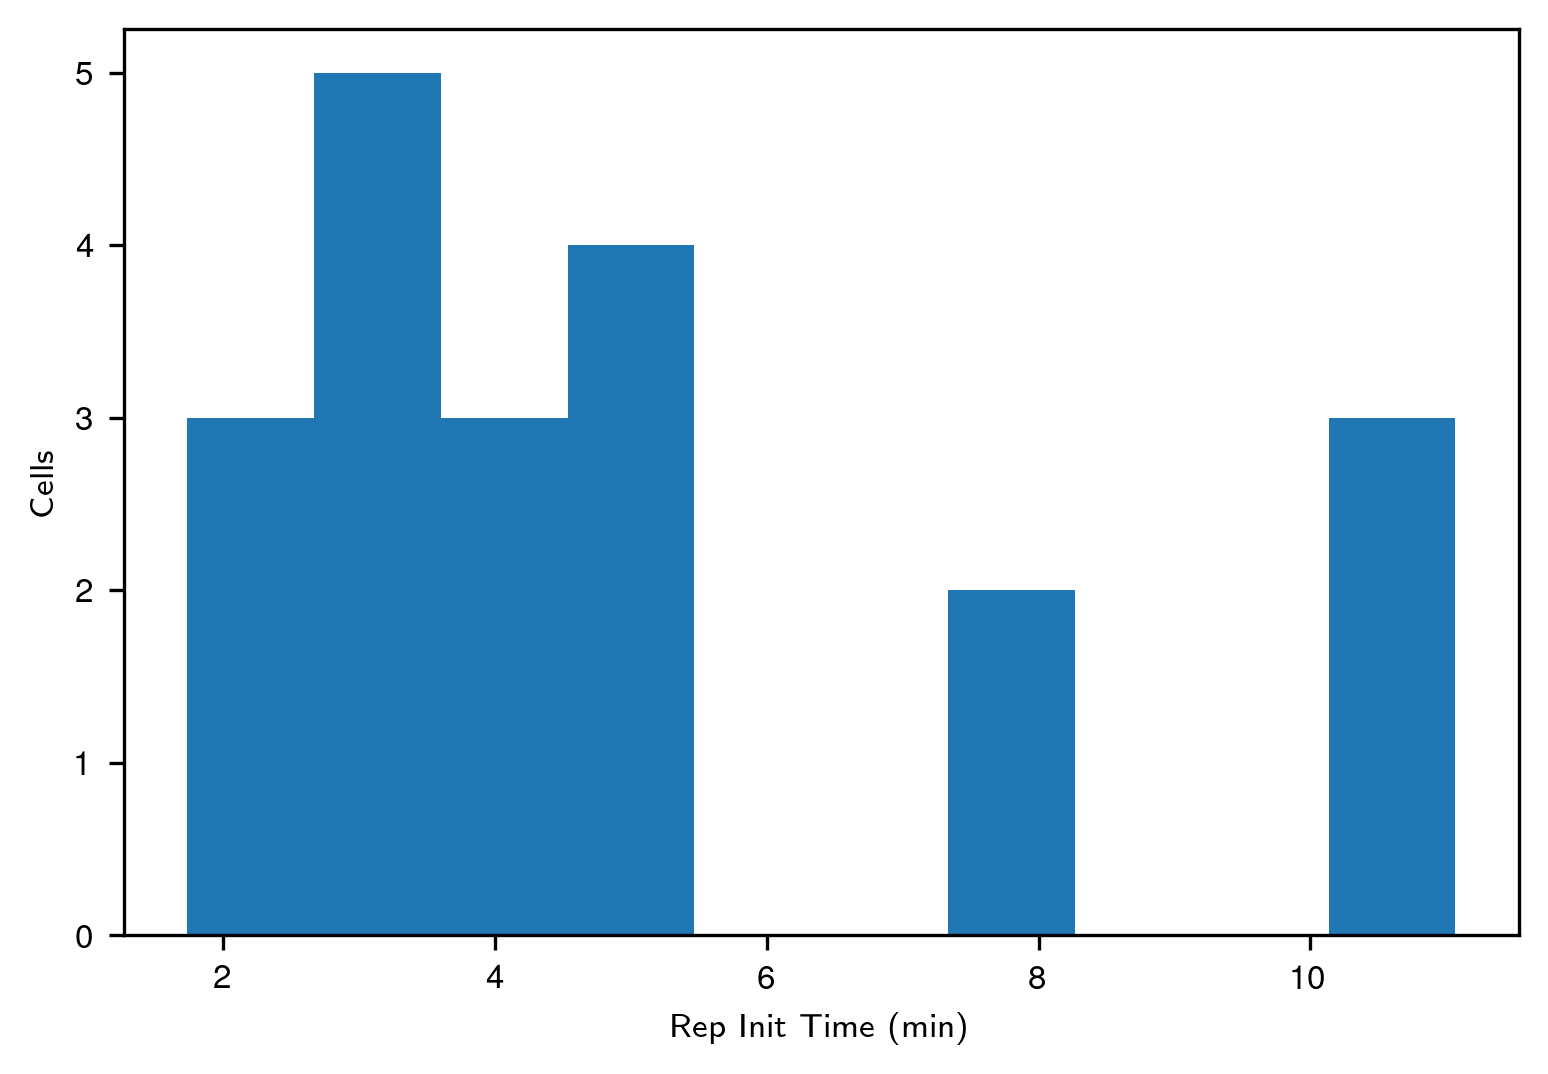

In [37]:
repDat = {}

for i in range(20,31):
    
    repInitCheckID = [f'ori_rep2_DnaA_{i}']

    repIC = w.get_species_traces(repInitCheckID)
    repIC = repIC[0].T
    
    repICdat = np.argwhere(repIC>0)
    
    if len(repICdat)>0:
    
        for repCheck in repICdat:

            replicate = repCheck[0]
            repTime = repCheck[1]
            
            if replicate not in repDat:
                repDat[replicate] = {}
                repDat[replicate]['time'] = totalTime
            repDat[replicate]['DnaA'] = i
            if repTime<repDat[replicate]['time']:
                repDat[replicate]['time'] = repTime
                
print(repDat)

repTimes = []
repDnaa = []

for repl, repI in repDat.items():
    repTimes.append(repI['time'])
    repDnaa.append(repI['DnaA'])
    
print(repTimes)
print(repDnaa)

plt.hist(np.array(repTimes)/60)
plt.xlabel('Rep Init Time (min)')
plt.ylabel('Cells')